In [1]:
import pandas as pd
import numpy as np
from ipykernel import kernelapp as app
import pypyodbc as podbc
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm

In [2]:
cars = pd.read_csv("Sauto2017_for_anchors_transformed.csv", engine='python', encoding='Latin_1')
calen = len(cars)
print(calen) 

306261


In [3]:
cars.head()

,make,model,make_model,makeyear,kilometer,power,price
0,Peugeot,406,peugeot406,1995,230000,81,10000
1,Peugeot,406,peugeot406,1996,161550,65,27000
2,Peugeot,406,peugeot406,2004,186300,80,44000
3,Peugeot,406,peugeot406,1998,254000,66,13000
4,Peugeot,406,peugeot406,2002,372000,80,16900


In [4]:
def to_2000(yy):
    if (yy<2000):
        return 2000
    return yy
def over_2017(yy):
    if (yy>2017):
        return 2017
    return yy
cars["makeyear"] = cars['makeyear'].apply(to_2000)
cars["makeyear"] = cars['makeyear'].apply(over_2017)
cars["age"] = cars['makeyear'].apply(lambda my: 2018-my)

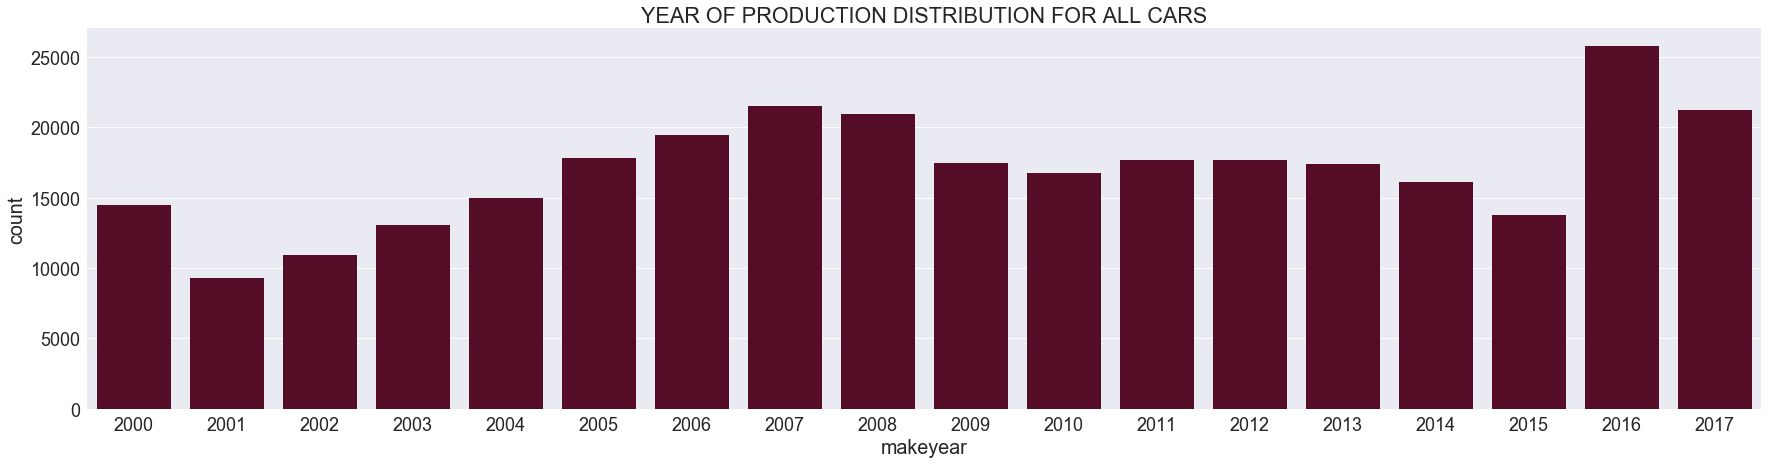

In [5]:
cars["makeyear"] = cars['makeyear'].apply(lambda my: int(my) )
sns.set_context("notebook",font_scale=1.8 )
plt.figure(figsize=(30,7))
plt.title('YEAR OF PRODUCTION DISTRIBUTION FOR ALL CARS')
g = sns.countplot(cars["makeyear"], color="#610023")
rotg = g.set_xticklabels(g.get_xticklabels())

In [6]:
def find_range(myp):
    if (myp<=10):
        return 0
    if ((myp>10)&(myp<=30)):
        return 1
    if ((myp>30)&(myp<=50)):
        return 2
    if ((myp>50)&(myp<=70)):
        return 3
    if ((myp>70)&(myp<=90)):
        return 4
    if ((myp>90)&(myp<=110)):
        return 5
    if ((myp>110)&(myp<=130)):
        return 6
    if ((myp>130)&(myp<=150)):
        return 7
    if ((myp>150)&(myp<=170)):
        return 8
    if ((myp>170)&(myp<=190)):
        return 9
    if ((myp>190)&(myp<=220)):
        return 10
    if ((myp>220)&(myp<=250)):
        return 11
    if ((myp>250)&(myp<=300)):
        return 12
    return 13

kilometer_range_count = pd.DataFrame()
kilometer_range_names = ['under 10k','10 to 30k','30 to 50k','50 to 70k','70 to 90k','90 to 110k','110 to 130k',
                         '130 to 150k','150 to 170k','170 to 190k','190 to 220k','220 to 250k','250 to 300k','over 300k']
ranglen = len(kilometer_range_names)
cars['kilometer'] = cars['kilometer'].apply(lambda km: float("%.3f" %(km/1000)))
cars["km_range"] = cars['kilometer'].apply(find_range)
cars["km_range"] = cars['km_range'].apply(lambda pr:int(pr))
cars.sort_values("km_range",ascending=True, inplace=True)
rangcount = [0]*ranglen
rangprice = [0]*ranglen
for i in range(0, ranglen):
    rangcount[i] = cars[cars.km_range==i]["km_range"].count()
    rangprice[i] = cars[cars.km_range==i]["price"].median()
kilometer_range_count["km_range"] = kilometer_range_names
kilometer_range_count["anchoring_count"] = rangcount 
kilometer_range_count["price"] = rangprice
kilometer_range_count["price"] = kilometer_range_count["price"].apply(lambda mk: int(mk)) 

In [7]:
kilometer_range_count

,km_range,anchoring_count,price
0,under 10k,28029,499000
1,10 to 30k,25162,439495
2,30 to 50k,12857,345000
3,50 to 70k,13028,255000
4,70 to 90k,15838,210000
5,90 to 110k,19617,179900
6,110 to 130k,23074,159000
7,130 to 150k,28165,149900
8,150 to 170k,29687,145000
9,170 to 190k,27882,139000


In [8]:
kilometer_range_count

,km_range,anchoring_count,price
0,under 10k,28029,499000
1,10 to 30k,25162,439495
2,30 to 50k,12857,345000
3,50 to 70k,13028,255000
4,70 to 90k,15838,210000
5,90 to 110k,19617,179900
6,110 to 130k,23074,159000
7,130 to 150k,28165,149900
8,150 to 170k,29687,145000
9,170 to 190k,27882,139000


In [9]:
cars["kilometer_range_names"] = cars['km_range'].apply(lambda pr: kilometer_range_names[pr])

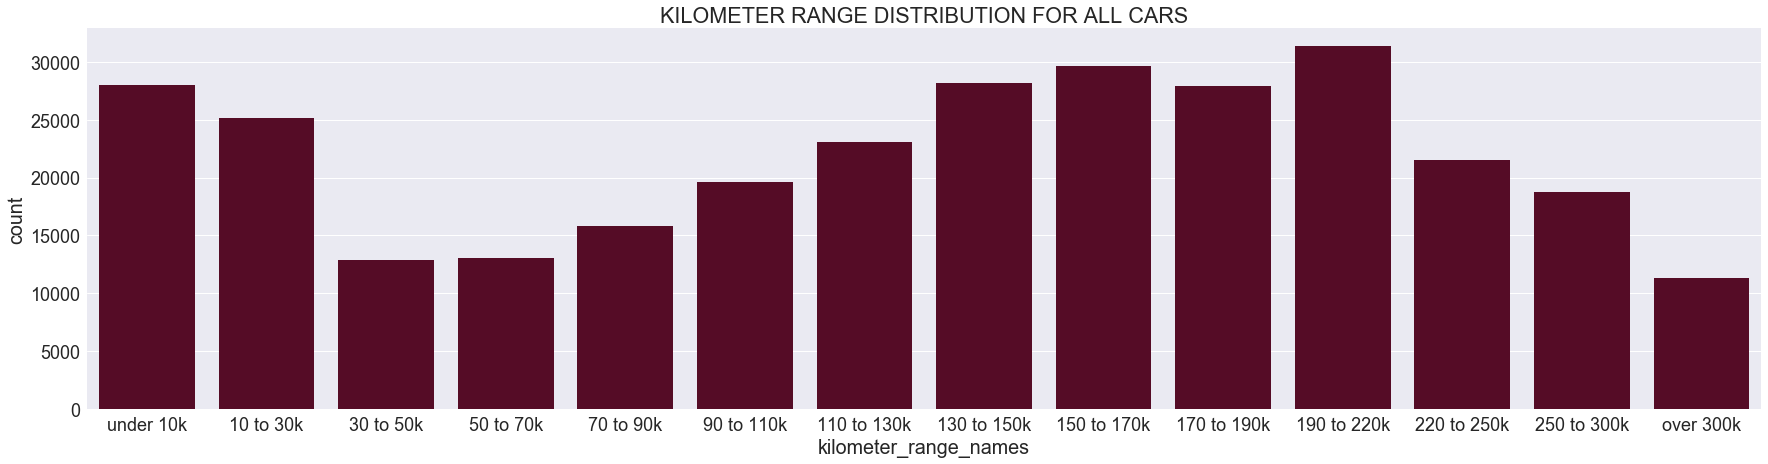

In [10]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,7))
plt.title('KILOMETER RANGE DISTRIBUTION FOR ALL CARS')
g = sns.countplot(cars['kilometer_range_names'], color="#610023")
rotg = g.set_xticklabels(g.get_xticklabels())

In [11]:
del cars["kilometer_range_names"]

In [12]:
mm_count = cars.groupby("make_model")["price"].count()
mm_count.reset_index()

,make_model,price
0,abarth500,34
1,abarth695,1
2,abarthgrande punto,3
3,abarthpunto,9
4,abarthpunto evo,1
5,acuramdx,4
6,acurazdx,1
7,aerominor,1
8,aixam400,3
9,aixam500,5


In [13]:
allbrands = cars['make_model'].unique()
blen = len(allbrands)
brand_count = [0]*blen
for i in range(0,blen):
    brand_count[i] = cars[cars.make_model==allbrands[i]]['make_model'].count()
brandDF = pd.DataFrame()
brandDF['make_model'] = allbrands    
brandDF['counts'] = brand_count   
brandDF = brandDF.sort_values('counts',ascending=False)  
brandDF['mmcode'] = np.arange(blen)
brands = brandDF['make_model'].unique()
brandDF.dropna( inplace=True)
brandDF

,make_model,counts,mmcode
2,skodaoctavia,33625,0
149,skodafabia,22050,1
22,vwpassat,9208,2
6,vwgolf,8608,3
165,skodasuperb,8538,4
280,fordfocus,6828,5
93,bmw3,4688,6
271,fordmondeo,4587,7
44,skodarapid,4366,8
26,vwtouran,3752,9


In [14]:
cars = pd.merge(cars, brandDF, on="make_model", how='outer')
print(len(cars))

306261


In [15]:
cars.head()

,make,model,make_model,makeyear,kilometer,power,price,age,km_range,counts,mmcode
0,Renault,Thalia,renaultthalia,2009,8.687,55,89900,9,0,719,92
1,Renault,Thalia,renaultthalia,2013,9.500,55,99000,5,0,719,92
2,Renault,Thalia,renaultthalia,2012,2.400,55,119900,6,0,719,92
3,Renault,Thalia,renaultthalia,2002,0.147,55,36000,16,0,719,92
4,Renault,Thalia,renaultthalia,2012,6.100,55,105000,6,0,719,92


def find_mmcode(mm):
    for i in range(0,blen):
        if (mm==brands[i]):
            return i
        return blen
cars["mm_code"] = cars["make_model"].apply(find_mmcode)    

In [16]:
cars.sort_values(["mmcode","makeyear","km_range","power"], ascending=[True,False,True,True], inplace=True )

In [17]:
cars.head()

,make,model,make_model,makeyear,kilometer,power,price,age,km_range,counts,mmcode
2402,Skoda,Octavia,skodaoctavia,2017,6.895,63,445000,1,0,33625,0
2401,Skoda,Octavia,skodaoctavia,2017,6.006,66,475000,1,0,33625,0
2528,Skoda,Octavia,skodaoctavia,2017,3.000,66,400000,1,0,33625,0
2764,Skoda,Octavia,skodaoctavia,2017,3.000,66,411062,1,0,33625,0
3075,Skoda,Octavia,skodaoctavia,2017,0.000,66,612900,1,0,33625,0


In [18]:
cars.tail()

,make,model,make_model,makeyear,kilometer,power,price,age,km_range,counts,mmcode
305823,Kia,Clarus,kiaclarus,2000,127.0,85,20000,18,6,1,1015
300736,Ligier,Ambra,ligierambra,2000,31.4,4,59000,18,2,1,1016
305857,Peugeot,Ranch,peugeotranch,2011,112.0,88,168000,7,6,1,1017
300735,Daihatsu,Copen,daihatsucopen,2007,41.0,64,159900,11,2,1,1018
306260,Mitsubishi,L400,mitsubishil400,2001,314.0,64,34000,17,13,1,1019


In [19]:
cars_meds = cars.groupby(["mmcode","make_model","age","km_range","power"])["price"].median()
cars_meds

mmcode  make_model         age  km_range  power
0       skodaoctavia       1    0         63         445000.0
                                          66         475000.0
                                          81         515900.0
                                          85         534707.0
                                          110        599888.0
                                          132        614900.0
                                          135        776762.5
                                          162        734400.0
                                          169        777300.0
                                          180        841750.0
                                1         63         346400.0
                                          66         399000.0
                                          81         452000.0
                                          85         496500.0
                                          110        584000.0
                      

In [20]:
len(cars_meds)

79939

In [21]:
cars_medians = cars_meds.to_frame()
cars_medians = cars_medians.reset_index(level=["mmcode","make_model","age","km_range","power"])

In [22]:
kilometer_range_names = ['under 10k','10 to 30k','30 to 50k','50 to 70k','70 to 90k','90 to 110k','110 to 130k',
                         '130 to 150k','150 to 170k','170 to 190k','190 to 220k','220 to 250k','250 to 300k','over 300k']
cars_medians = cars_medians.rename(columns={"age":"age_years","price":"anchor"})
cars_medians["anchor"] = cars_medians["anchor"].apply(lambda pp: int(pp))
cars_medians["range_name"] = cars_medians["km_range"].apply(lambda kr: kilometer_range_names[kr]) 

In [23]:
coltk = ["make_model","mmcode","age_years","km_range", "range_name","power","anchor"]
cars_medians = cars_medians[coltk]
cars_medians

,make_model,mmcode,age_years,km_range,range_name,power,anchor
0,skodaoctavia,0,1,0,under 10k,63,445000
1,skodaoctavia,0,1,0,under 10k,66,475000
2,skodaoctavia,0,1,0,under 10k,81,515900
3,skodaoctavia,0,1,0,under 10k,85,534707
4,skodaoctavia,0,1,0,under 10k,110,599888
5,skodaoctavia,0,1,0,under 10k,132,614900
6,skodaoctavia,0,1,0,under 10k,135,776762
7,skodaoctavia,0,1,0,under 10k,162,734400
8,skodaoctavia,0,1,0,under 10k,169,777300
9,skodaoctavia,0,1,0,under 10k,180,841750


In [ ]:
cars_medians.to_csv(path_or_buf='Sauto_all2017_new_anchors.csv', index=False, index_label=None)
#print('kuk')

### Training set processing

In [98]:
cars = pd.read_csv("sold2016_7allsC_coded_cars.csv", engine='python', encoding='Latin_1')      # outfile input
calen = len(cars)   
calen

90459

In [99]:
cars.columns

Index(['id', 'make', 'model', 'make_model', 'kilometer', 'age', 'power',
       'sizeccm', 'body', 'fueltype', 'automat', 'drive', 'mec_con', 'ext_con',
       'isfirstowner', 'isservicebook', 'isvat', 'autoaircondition',
       'airconditioned', 'isxenon', 'isled', 'isnavigation', 'iscruisecontrol',
       'isinleather', 'airbags', 'makeyear', 'km/1000', 'revage', 'revkm',
       'age*price', 'km*price', 'make_cd', 'model_cd', 'body_cd', 'fuel_cd',
       'days_on', 'price'],
      dtype='object')

#### make_model coding and fixing

In [100]:
def fix_models(mm):
    if (mm=="fordfocus c-max"):
        return "fordc-max"
    if (mm=="renaultmegane scenic"):
        return "renaultscenic"
    if (mm=="opelzafira tourer"):
        return "opelzafira"
    if (mm=="seataltea xl"):
        return "seataltea"
    if (mm=="mazda323"):
        return "mazda3"
    if (mm=="nissanalmera tino"):
        return "nissanalmera"
    if (mm=="mercedesgla"):
        return "mercedesgla-class"
    if (mm=="mercedesgle coupe"):
        return "mercedesgle"
    if (mm=="kiapro_ceed"):
        return "kiapro ceed"
    if (mm=="hyundaiatos prime"):
        return "hyundaiatos"
    if (mm=="hyundaih-1 tour"):
        return "hyundaih-1"
    if (mm=="chryslerp. t. cruiser"):
        return "chryslerpt cruiser"
    if (mm=="toyotaland cruiser v8"):
        return "toyotaland cruiser"
    if (mm=="alfa romeogt"):
        return "alfa romeo3000 gt"
    if (mm=="audiallroad a4"):
        return "audia4 allroad"
    return mm
cars["make_model"] = cars["make_model"].apply(fix_models)

In [101]:
len(cars.columns)

37

In [102]:
cols_to_keep = ["id","make","model","make_model","makeyear","kilometer","age","power","sizeccm","body","fueltype",
                "automat","drive","mec_con","ext_con","isfirstowner","isservicebook","isvat","autoaircondition",
                "airconditioned","isxenon","isled","isnavigation","iscruisecontrol","isinleather","airbags","revage",
                "revkm","make_cd","model_cd","body_cd","fuel_cd","price"]
cars = cars[cols_to_keep]
len(cars.columns)

33

In [103]:
cars.head()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,iscruisecontrol,isinleather,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price
0,900004590,opel,meriva,opelmeriva,2015,13190,21,88,1364,compact mpv,...,0,0,0,1272.77,1429.83,11,354,7,2,320.0
1,907426,vw,caddy,vwcaddy,2007,279780,237,51,1968,pickup,...,0,0,1,112.78,67.41,34,195,9,1,77.0
2,700010234,skoda,octavia,skodaoctavia,2009,131507,161,103,1968,combi,...,0,0,0,166.01,143.41,30,251,5,1,216.0
3,700011128,skoda,octavia,skodaoctavia,2010,132494,149,103,1968,combi,...,0,0,0,179.38,142.34,30,251,5,1,198.0
4,700012854,suzuki,grand vitara,suzukigrand vitara,1999,151707,421,106,2493,suv,...,0,0,0,63.49,124.32,41,411,8,2,60.0


In [104]:
brandDF.head()

,make_model,counts,mmcode
2,skodaoctavia,33625,0
149,skodafabia,22050,1
22,vwpassat,9208,2
6,vwgolf,8608,3
165,skodasuperb,8538,4


In [105]:
cars = pd.merge(cars, brandDF, on="make_model", how='outer')
print(len(cars))

90876


In [106]:
cars = cars.head(90459)

In [107]:
len(cars.columns)

35

In [108]:
cars.columns

Index(['id', 'make', 'model', 'make_model', 'makeyear', 'kilometer', 'age',
       'power', 'sizeccm', 'body', 'fueltype', 'automat', 'drive', 'mec_con',
       'ext_con', 'isfirstowner', 'isservicebook', 'isvat', 'autoaircondition',
       'airconditioned', 'isxenon', 'isled', 'isnavigation', 'iscruisecontrol',
       'isinleather', 'airbags', 'revage', 'revkm', 'make_cd', 'model_cd',
       'body_cd', 'fuel_cd', 'price', 'counts', 'mmcode'],
      dtype='object')

In [109]:
del cars["counts"]

In [110]:
cars.tail()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,isinleather,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode
90454,900127617.0,opel,crossland x,opelcrossland x,2017.0,401.0,3.0,60.0,1198.0,suv,...,0.0,0.0,8909.38,47031.08,11.0,619.0,8.0,2.0,320.0,279.0
90455,900128520.0,kia,stonic,kiastonic,2017.0,9.0,1.0,62.0,1248.0,suv,...,0.0,0.0,26728.15,2095495.69,35.0,591.0,8.0,2.0,400.0,372.0
90456,900128783.0,kia,stonic,kiastonic,2017.0,10.0,3.0,62.0,1248.0,suv,...,0.0,0.0,8909.38,1885946.12,35.0,591.0,8.0,2.0,400.0,372.0
90457,900131980.0,kia,stonic,kiastonic,2017.0,8.0,-1.0,62.0,1248.0,suv,...,0.0,0.0,-26728.15,2357432.65,35.0,591.0,8.0,2.0,400.0,372.0
90458,900131620.0,hyundai,xg,hyundaixg,2003.0,187241.0,353.0,138.0,2972.0,sedan/saloon,...,1.0,0.0,75.72,100.72,38.0,497.0,4.0,2.0,45.0,578.0


In [111]:
cars["mmcode"].fillna(1008,inplace=True)
missing_mms = cars[cars.mmcode==1008] 
len(missing_mms)

66

In [112]:
print(len(missing_mms['make_model'].unique()))
missing_mms['make_model'].unique()

34


array(['awzp70', 'bmw6 gran coupe', 'rover220', 'gazvolga 21',
       'fiat500l living', 'gaz24 - volga', 'tatra57', 'dacia1310',
       'subaruwrx sti', 'tatra603', 'skoda440 spartak', 'moskvic407',
       'lanciay', 'trabantp 601', 'alfa romeo3000 gt', 'bmw4 gran coupe',
       'skoda1201', 'toyotaavensis verso', 'rover214', 'rover414',
       'gaz13 chaika', 'toyotaverso-s', 'ssang yongactyon sports',
       'aston martinv8 vantage', 'minicoupe', 'fordka+', 'fiskerkarma',
       'fiat500c', 'nissanserena', 'alpinab7', 'daewoofso truck',
       'daewoolacetti', 'renaultrapid', 'toyotaprius+'], dtype=object)

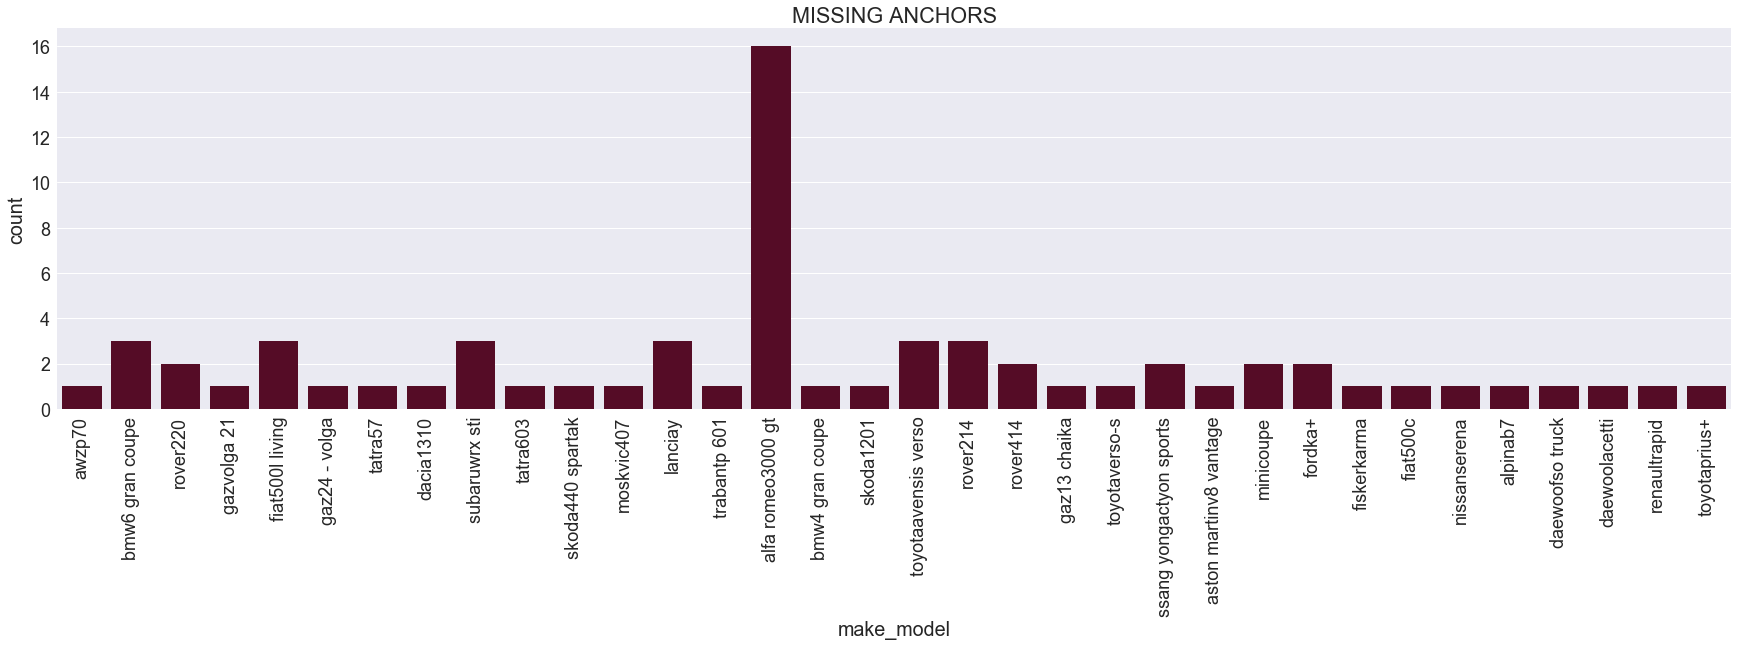

In [113]:
sns.set_context("notebook",font_scale=1.8 )
plt.figure(figsize=(30,7))
plt.title('MISSING ANCHORS')
g = sns.countplot(missing_mms['make_model'], color="#610023")
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [114]:
cars_medians = pd.read_csv('Sauto_all2017_basic_trans.csv', engine='python', encoding='Latin_1') 
medlen = len(cars_medians)   
medlen

205445

In [115]:
cars_medians[cars_medians.make=="alfa romeo"]["model"].unique()

array(['147', 'brera', '159', 'giulietta', '166', 'mito', '156', 'gtv',
       '3000 gt', '145', 'stelvio', '146', 'giulia', 'crosswagon', '155',
       '33', 'spider', '0'], dtype=object)

In [116]:
cars[cars.make=="alfa romeo"]["model"].unique()

array(['giulietta', '145', '159', '146', '147', '156', 'gt', 'mito',
       'brera', '166', 'gtv', '4c'], dtype=object)

#### Kilometer range setting

In [117]:
def find_range(myp):
    if (myp<=10):
        return 0
    if ((myp>10)&(myp<=30)):
        return 1
    if ((myp>30)&(myp<=50)):
        return 2
    if ((myp>50)&(myp<=70)):
        return 3
    if ((myp>70)&(myp<=90)):
        return 4
    if ((myp>90)&(myp<=110)):
        return 5
    if ((myp>110)&(myp<=130)):
        return 6
    if ((myp>130)&(myp<=150)):
        return 7
    if ((myp>150)&(myp<=170)):
        return 8
    if ((myp>170)&(myp<=190)):
        return 9
    if ((myp>190)&(myp<=220)):
        return 10
    if ((myp>220)&(myp<=250)):
        return 11
    if ((myp>250)&(myp<=300)):
        return 12
    return 13

cars['kilometer'] = cars['kilometer'].apply(lambda km: float("%.3f" %(km/1000)))
cars["km_range"] = cars['kilometer'].apply(find_range)
cars["km_range"] = cars['km_range'].apply(lambda pr:int(pr))
cars.head()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,km_range
0,900004590.0,opel,meriva,opelmeriva,2015.0,13.190,21.0,88.0,1364.0,compact mpv,...,0.0,1272.77,1429.83,11.0,354.0,7.0,2.0,320.0,52.0,1
1,1120623.0,opel,meriva,opelmeriva,2015.0,9.855,23.0,74.0,1398.0,compact mpv,...,0.0,1162.09,1913.69,11.0,354.0,7.0,2.0,300.0,52.0,0
2,900047306.0,opel,meriva,opelmeriva,2014.0,20.058,43.0,88.0,1364.0,compact mpv,...,0.0,621.58,940.25,11.0,354.0,7.0,2.0,290.0,52.0,1
3,900132388.0,opel,meriva,opelmeriva,2014.0,126.450,81.0,88.0,1364.0,compact mpv,...,0.0,329.98,149.15,11.0,354.0,7.0,2.0,200.0,52.0,6
4,1120621.0,opel,meriva,opelmeriva,2015.0,7.994,27.0,74.0,1398.0,compact mpv,...,0.0,989.93,2359.20,11.0,354.0,7.0,2.0,320.0,52.0,0


#### age in years setting

In [118]:
cars["age_years"] = cars["makeyear"].apply(lambda km: int(2018-km))
cars.head()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,km_range,age_years
0,900004590.0,opel,meriva,opelmeriva,2015.0,13.190,21.0,88.0,1364.0,compact mpv,...,1272.77,1429.83,11.0,354.0,7.0,2.0,320.0,52.0,1,3
1,1120623.0,opel,meriva,opelmeriva,2015.0,9.855,23.0,74.0,1398.0,compact mpv,...,1162.09,1913.69,11.0,354.0,7.0,2.0,300.0,52.0,0,3
2,900047306.0,opel,meriva,opelmeriva,2014.0,20.058,43.0,88.0,1364.0,compact mpv,...,621.58,940.25,11.0,354.0,7.0,2.0,290.0,52.0,1,4
3,900132388.0,opel,meriva,opelmeriva,2014.0,126.450,81.0,88.0,1364.0,compact mpv,...,329.98,149.15,11.0,354.0,7.0,2.0,200.0,52.0,6,4
4,1120621.0,opel,meriva,opelmeriva,2015.0,7.994,27.0,74.0,1398.0,compact mpv,...,989.93,2359.20,11.0,354.0,7.0,2.0,320.0,52.0,0,3


#### anchor finding

In [119]:
cars_anchors = pd.read_csv("Sauto_all2017_new_anchors.csv", engine='python', encoding='Latin_1')
anclen = len(cars_anchors)   
anclen

79939

In [120]:
cars_anchors.head()

,make_model,mmcode,age_years,km_range,range_name,power,anchor
0,skodaoctavia,0,1,0,under 10k,63,445000
1,skodaoctavia,0,1,0,under 10k,66,475000
2,skodaoctavia,0,1,0,under 10k,81,515900
3,skodaoctavia,0,1,0,under 10k,85,534707
4,skodaoctavia,0,1,0,under 10k,110,599888


In [121]:
cars = pd.merge(cars, cars_anchors, on=["mmcode","age_years","km_range","power"], how='inner')
print(len(cars))    

76174


In [122]:
cars.columns

Index(['id', 'make', 'model', 'make_model_x', 'makeyear', 'kilometer', 'age',
       'power', 'sizeccm', 'body', 'fueltype', 'automat', 'drive', 'mec_con',
       'ext_con', 'isfirstowner', 'isservicebook', 'isvat', 'autoaircondition',
       'airconditioned', 'isxenon', 'isled', 'isnavigation', 'iscruisecontrol',
       'isinleather', 'airbags', 'revage', 'revkm', 'make_cd', 'model_cd',
       'body_cd', 'fuel_cd', 'price', 'mmcode', 'km_range', 'age_years',
       'make_model_y', 'range_name', 'anchor'],
      dtype='object')

In [123]:
carscols = ['id', 'make', 'model', 'make_model_x', 'kilometer', 'age', 'power', 'sizeccm', 'body', 'fueltype', 'automat',
            'drive', 'mec_con', 'ext_con','isfirstowner', 'isservicebook', 'isvat', 'autoaircondition', 'airconditioned',
            'isxenon', 'isled', 'isnavigation', 'iscruisecontrol', 'isinleather', 'airbags', 'makeyear', 'km/1000', 'revage',
            'revkm', 'age*price', 'km*price', 'make_cd', 'model_cd', 'body_cd', 'fuel_cd', 'price', 'mmcode', 'km_range',
            'age_years', 'make_model_y', 'range_name', 'anchor']
import json
json.dumps(carscols)

'["id", "make", "model", "make_model_x", "kilometer", "age", "power", "sizeccm", "body", "fueltype", "automat", "drive", "mec_con", "ext_con", "isfirstowner", "isservicebook", "isvat", "autoaircondition", "airconditioned", "isxenon", "isled", "isnavigation", "iscruisecontrol", "isinleather", "airbags", "makeyear", "km/1000", "revage", "revkm", "age*price", "km*price", "make_cd", "model_cd", "body_cd", "fuel_cd", "price", "mmcode", "km_range", "age_years", "make_model_y", "range_name", "anchor"]'

In [124]:
cols_to_keep = ["id","make","model","make_model_x","makeyear","kilometer","age","power","sizeccm","body","fueltype",
                "automat","drive","mec_con","ext_con","isfirstowner","isservicebook","isvat","autoaircondition",
                "airconditioned","isxenon","isled","isnavigation","iscruisecontrol","isinleather","airbags","revage",
                "revkm","make_cd","model_cd","body_cd","fuel_cd","price","mmcode","anchor"]
cars = cars[cols_to_keep]
cars = cars.rename(columns={"make_model_x":"make_model"})
cols_to_int = ["id","makeyear","age","power","sizeccm","automat","drive","mec_con","ext_con","isfirstowner","isservicebook",
               "isvat","autoaircondition","airconditioned","isxenon","isled","isnavigation","iscruisecontrol","isinleather",
               "airbags","model_cd","body_cd","fuel_cd","price","mmcode","anchor"]
ctilen = len(cols_to_int)
for i in range(0, ctilen):
    cars[cols_to_int[i]] = cars[cols_to_int[i]].apply(lambda ct: int(ct))
cars.head()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,anchor
0,900004590,opel,meriva,opelmeriva,2015,13.190,21,88,1364,compact mpv,...,0,1272.77,1429.83,11.0,354,7,2,320,52,299000
1,900013465,opel,meriva,opelmeriva,2015,12.050,19,88,1364,compact mpv,...,0,1406.74,1565.10,11.0,354,7,2,320,52,299000
2,900014331,opel,meriva,opelmeriva,2015,10.037,17,88,1364,compact mpv,...,0,1572.24,1878.99,11.0,354,7,2,335,52,299000
3,900013478,opel,meriva,opelmeriva,2015,13.978,19,88,1364,compact mpv,...,0,1406.74,1349.22,11.0,354,7,2,340,52,299000
4,900013481,opel,meriva,opelmeriva,2015,12.534,15,88,1364,compact mpv,...,0,1781.88,1504.66,11.0,354,7,2,370,52,299000


In [125]:
cars.to_csv(path_or_buf='sold2016_7allnew_anchored_cars.csv', index=False, index_label=None)
print('kuk')

kuk


In [126]:
octavia = cars[cars.model=="octavia"]
octavia.head()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,anchor
459,700010234,skoda,octavia,skodaoctavia,2009,131.507,161,103,1968,combi,...,0,166.01,143.41,30.0,251,5,1,216,0,210000
460,700010738,skoda,octavia,skodaoctavia,2009,145.506,185,103,1968,combi,...,0,144.48,129.61,30.0,251,5,1,200,0,210000
461,900090325,skoda,octavia,skodaoctavia,2009,145.989,179,103,1968,combi,...,0,149.32,129.18,30.0,251,5,1,198,0,210000
462,900134145,skoda,octavia,skodaoctavia,2009,145.895,193,103,1968,hatchback,...,0,138.49,129.27,30.0,251,3,1,210,0,210000
463,900017683,skoda,octavia,skodaoctavia,2009,148.703,165,103,1968,combi,...,0,161.99,126.83,30.0,251,5,1,236,0,210000


In [127]:
octavia.tail()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,anchor
9685,900131728,skoda,octavia,skodaoctavia,2011,100.131,165,74,1896,combi,...,0,161.99,188.35,30.0,251,5,1,176,0,145000
9686,900131604,skoda,octavia,skodaoctavia,2002,319.680,367,74,1896,combi,...,0,72.83,58.99,30.0,251,5,1,60,0,63000
9687,900132006,skoda,octavia,skodaoctavia,2009,233.331,205,75,1595,hatchback,...,0,130.38,80.83,30.0,251,3,2,100,0,130000
9688,900132119,skoda,octavia,skodaoctavia,2015,113.701,59,110,1968,combi,...,0,453.02,165.87,30.0,251,5,1,370,0,385000
9689,900132107,skoda,octavia,skodaoctavia,2016,51.914,39,66,1598,hatchback,...,0,685.34,363.28,30.0,251,3,1,300,0,349450


In [128]:
fabia = cars[cars.model=="fabia"]
fabia.head()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,anchor
15507,900047316,skoda,fabia,skodafabia,2003,234.315,309,47,1198,hatchback,...,0,86.50,80.49,30.0,247,3,2,53,1,45450
15508,900091731,skoda,fabia,skodafabia,2003,221.890,329,47,1896,hatchback,...,0,81.24,84.99,30.0,247,3,1,60,1,45450
15509,900092001,skoda,fabia,skodafabia,2003,228.814,337,47,1198,combi,...,0,79.31,82.42,30.0,247,5,2,36,1,45450
15510,900095945,skoda,fabia,skodafabia,2003,226.531,335,47,1198,combi,...,0,79.79,83.25,30.0,247,5,2,40,1,45450
15511,900040441,skoda,fabia,skodafabia,2003,246.910,307,47,1198,combi,...,0,87.06,76.38,30.0,247,5,2,40,1,45450


In [129]:
kodiaq = cars[cars.model=="kodiaq"]
kodiaq

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,airbags,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,anchor
75268,900090852,skoda,kodiaq,skodakodiaq,2017,9.986,17,110,1395,suv,...,0,1572.24,1888.59,30.0,487,8,2,700,119,899000
75269,900090848,skoda,kodiaq,skodakodiaq,2017,8.865,13,110,1395,suv,...,0,2056.01,2127.41,30.0,487,8,2,730,119,899000
75270,900090851,skoda,kodiaq,skodakodiaq,2017,9.403,19,110,1395,suv,...,0,1406.74,2005.69,30.0,487,8,2,700,119,899000
75271,900090845,skoda,kodiaq,skodakodiaq,2017,8.353,19,110,1395,suv,...,0,1406.74,2257.81,30.0,487,8,2,700,119,899000
75272,900094784,skoda,kodiaq,skodakodiaq,2017,7.698,17,110,1968,suv,...,0,1572.24,2449.92,30.0,487,8,1,740,119,899000
75273,900095123,skoda,kodiaq,skodakodiaq,2017,0.131,5,110,1395,suv,...,0,5345.63,143965.35,30.0,487,8,2,780,119,899000
75274,900095124,skoda,kodiaq,skodakodiaq,2017,0.131,3,110,1395,suv,...,0,8909.38,143965.35,30.0,487,8,2,780,119,899000
75275,900095121,skoda,kodiaq,skodakodiaq,2017,0.131,5,110,1395,suv,...,0,5345.63,143965.35,30.0,487,8,2,780,119,899000
75276,900095466,skoda,kodiaq,skodakodiaq,2017,0.007,5,110,1968,suv,...,0,5345.63,2694208.74,30.0,487,8,1,780,119,899000
75277,900096531,skoda,kodiaq,skodakodiaq,2017,0.048,5,110,1395,suv,...,0,5345.63,392905.44,30.0,487,8,2,740,119,899000


In [130]:
cars["price"] = cars["price"].apply(lambda pp: int(pp*1000))

In [131]:
cars["adiff%"] = (cars["price"]-cars["anchor"])/(cars["price"]+cars["anchor"])
cars["adiff%"] = cars["adiff%"].apply(lambda ad: float("%.1f" %(200*ad))) 
cars["abs"] = cars["adiff%"].apply(lambda bb: abs(bb))
print(cars["abs"].median())
del cars["abs"]

10.5


In [ ]:
cars1 = cars[cars.model=="octavia"]
cars1["abs"] = cars1["adiff%"].apply(lambda bb: abs(bb))

In [133]:
print(cars1["abs"].median())
del cars1["abs"]

9.5


In [134]:
cars["price"] = cars["price"].apply(lambda pp: float("%.3f" %(pp/1000)))
cars["anchor"] = cars["anchor"].apply(lambda pp: float("%.3f" %(pp/1000)))

In [135]:
cars.head()

,id,make,model,make_model,makeyear,kilometer,age,power,sizeccm,body,...,revage,revkm,make_cd,model_cd,body_cd,fuel_cd,price,mmcode,anchor,adiff%
0,900004590,opel,meriva,opelmeriva,2015,13.190,21,88,1364,compact mpv,...,1272.77,1429.83,11.0,354,7,2,320.0,52,299.0,6.8
1,900013465,opel,meriva,opelmeriva,2015,12.050,19,88,1364,compact mpv,...,1406.74,1565.10,11.0,354,7,2,320.0,52,299.0,6.8
2,900014331,opel,meriva,opelmeriva,2015,10.037,17,88,1364,compact mpv,...,1572.24,1878.99,11.0,354,7,2,335.0,52,299.0,11.4
3,900013478,opel,meriva,opelmeriva,2015,13.978,19,88,1364,compact mpv,...,1406.74,1349.22,11.0,354,7,2,340.0,52,299.0,12.8
4,900013481,opel,meriva,opelmeriva,2015,12.534,15,88,1364,compact mpv,...,1781.88,1504.66,11.0,354,7,2,370.0,52,299.0,21.2


In [136]:
cars.columns

Index(['id', 'make', 'model', 'make_model', 'makeyear', 'kilometer', 'age',
       'power', 'sizeccm', 'body', 'fueltype', 'automat', 'drive', 'mec_con',
       'ext_con', 'isfirstowner', 'isservicebook', 'isvat', 'autoaircondition',
       'airconditioned', 'isxenon', 'isled', 'isnavigation', 'iscruisecontrol',
       'isinleather', 'airbags', 'revage', 'revkm', 'make_cd', 'model_cd',
       'body_cd', 'fuel_cd', 'price', 'mmcode', 'anchor', 'adiff%'],
      dtype='object')

In [140]:
del cars["mmcode"]

In [141]:
conn=podbc.connect("Driver={SQL Server};Server=CZPHAAADS01;Database=Pricing;uid=data_reader;pwd=data_reader123")
myqr="SELECT [mmcode] AS [tscode], [make_model], [counts] FROM [Pricing].[dbo].[train_make_model_count];"                          # mmcode from train set
train_mmcode = pd.read_sql_query(myqr, conn)
train_mmcode

,tscode,make_model,counts
0,1.0,skodaoctavia,9136.0
1,2.0,skodafabia,9016.0
2,3.0,vwpassat,2868.0
3,4.0,fordfocus,2229.0
4,5.0,fordmondeo,1812.0
5,6.0,skodasuperb,1794.0
6,7.0,vwgolf,1700.0
7,8.0,hyundaii30,1475.0
8,9.0,renaultmegane,1092.0
9,10.0,skodayeti,1033.0


In [142]:
cars = pd.merge(cars, train_mmcode, on=["make_model"], how='inner')
print(len(cars))    

76144


#### FEATURE IMPORTANCES

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
carst120 = cars[(cars.tscode<121)&(cars.tscode>0)]

In [ ]:
prediction_var = ["body_cd","fuel_cd","revkm","revage","power","sizeccm","automat","drive",
                  "mec_con","ext_con","isfirstowner","isservicebook","isvat","autoaircondition","airconditioned",
                  "isxenon","isled","isnavigation","iscruisecontrol","isinleather","airbags","anchor"]
my_model = ""
mm_price = [0]*50
test_mm_price = [0]*50
pred_errors = [0]*50
anch_errors = [0]*50
for i in range(0,50):
    my_model = models50[i]
    mycars = carsT50[carsT50.make_model==my_model]
    mm_price[i] = int(1000*mycars['price'].mean())
    if (tcounts[i]==0):
        anch_errors[i] = 0
        test_mm_price[i] = 0
        pred_errors[i] = 0        
    else:
        mycars1 = carst50[carst50.make_model==my_model]
        test_mm_price[i] = int(1000*mycars1['price'].median())
        anch_errors[i] = float("%.1f" %(mycars1['anabs'].median()))
        rafo = RandomForestRegressor(n_estimators=33, max_depth=33, max_features=16, random_state=42 )
        X = mycars[prediction_var]
        y = mycars["price"]
        X_tr, X_test, y_tr, y_test = train_test_split(X,y,test_size=0.10,random_state=42)
        rafo.fit(X_tr,y_tr) 
        test_X = mycars1[prediction_var]
        test_y = mycars1.price
        y_pred= rafo.predict(test_X)
        mycars1["pred_price"] = y_pred
        mycars1["diff%"] = 100*(mycars1["pred_price"]-mycars1["price"])/mycars1["price"]
        mycars1["diff%"] = mycars1["diff%"].apply(lambda pp: float("%.1f" %(pp)))
        mycars1["prabs"] = mycars1["diff%"].apply(lambda bb: abs(bb))
        pred_errors[i] = float("%.1f" %(mycars1["prabs"].median()))

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm

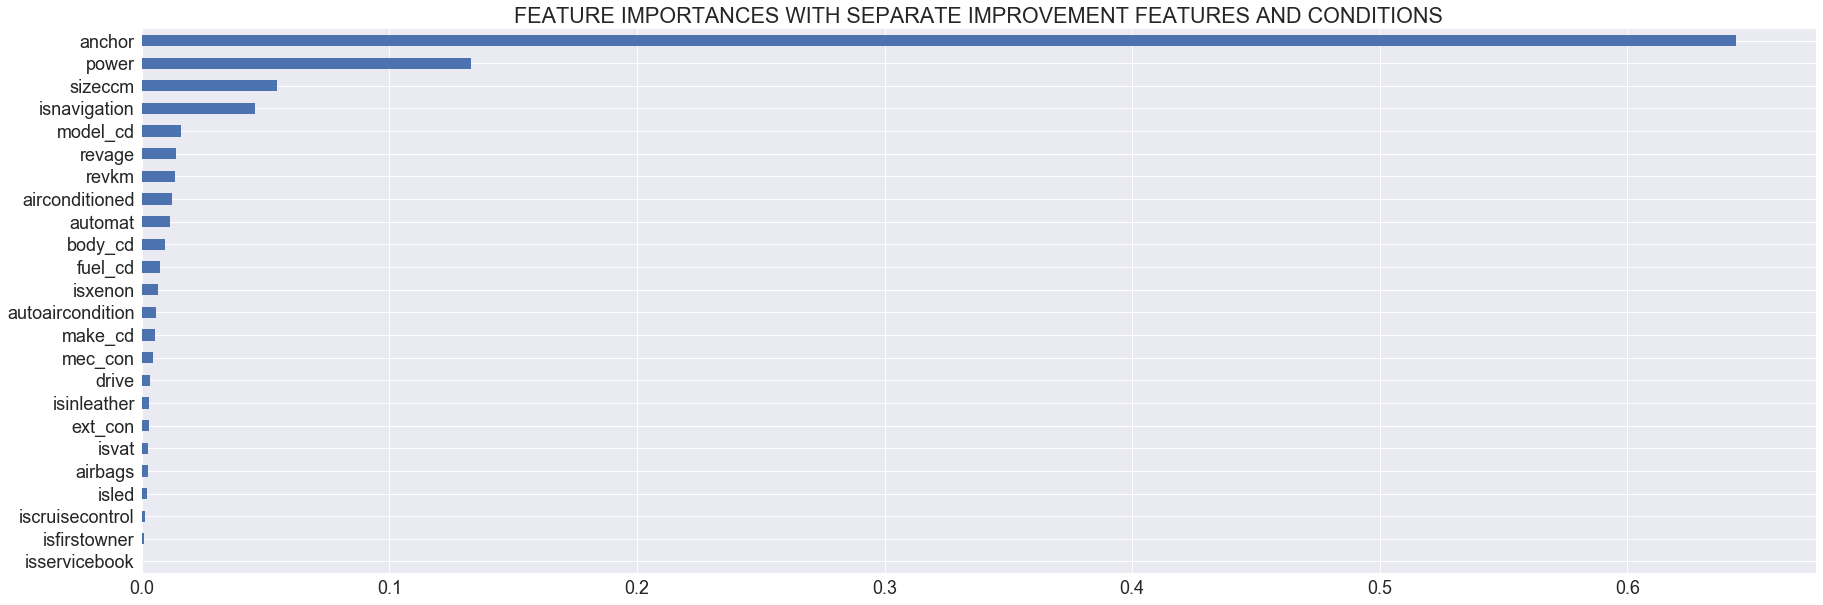

In [65]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[0].plot.barh()
plt.draw()
plt.show()

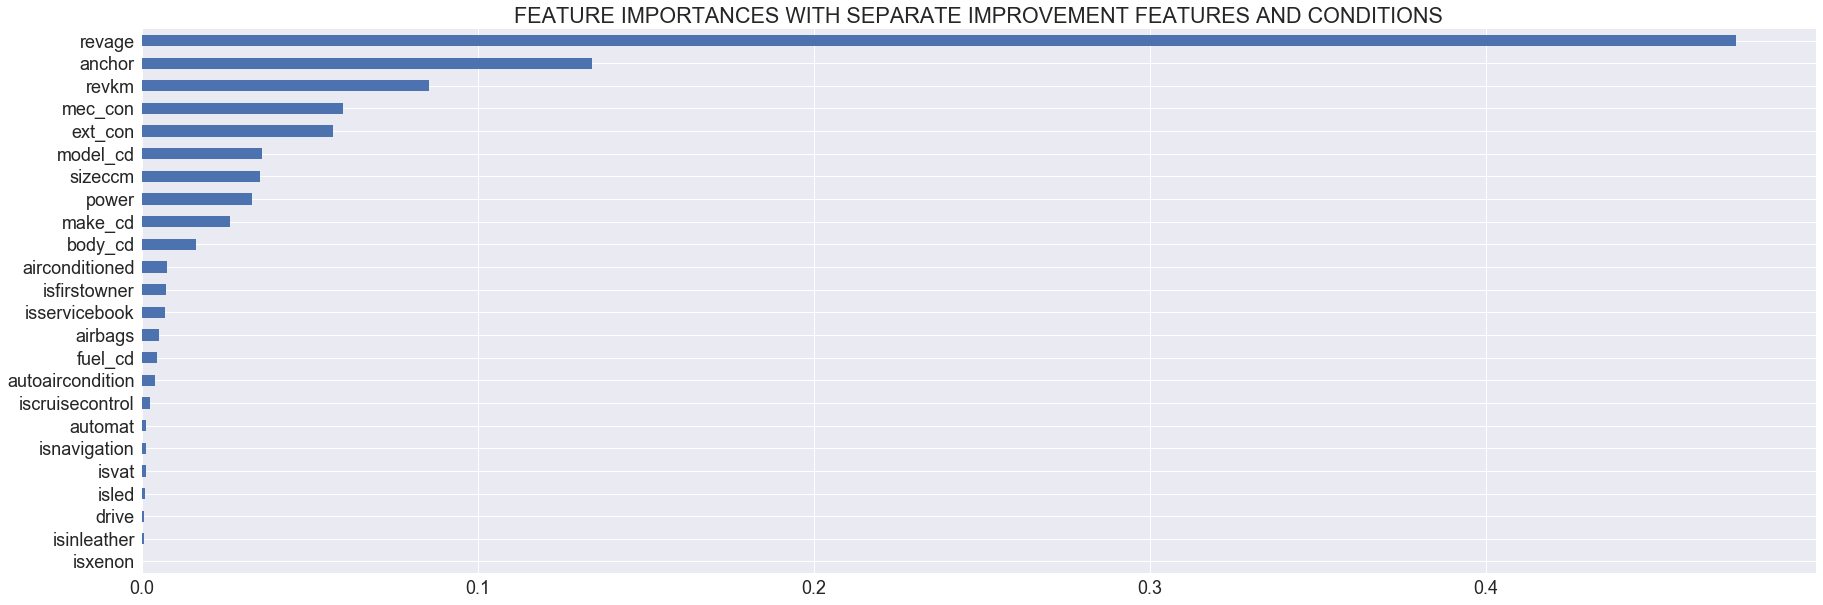

In [66]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[1].plot.barh()
plt.draw()
plt.show()

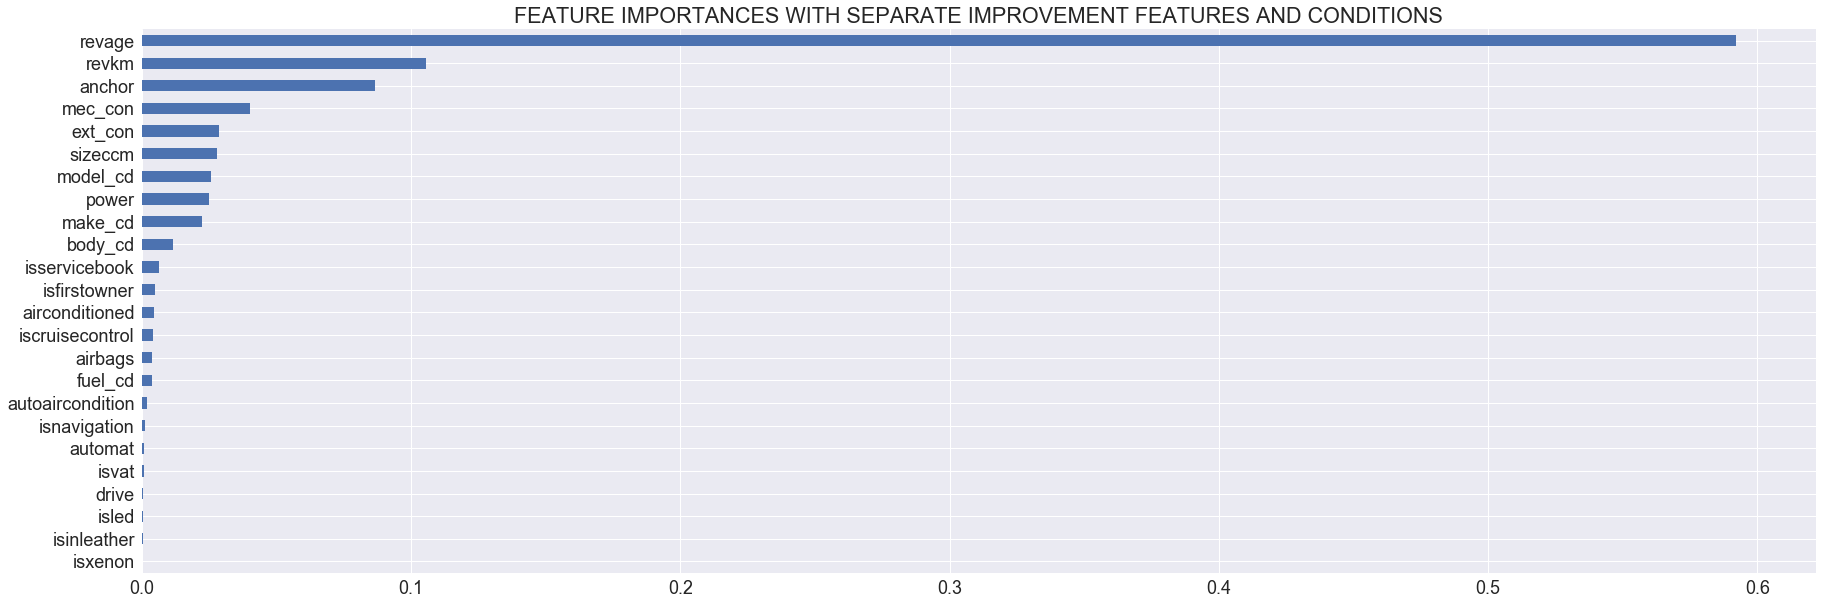

In [67]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[2].plot.barh()
plt.draw()
plt.show()

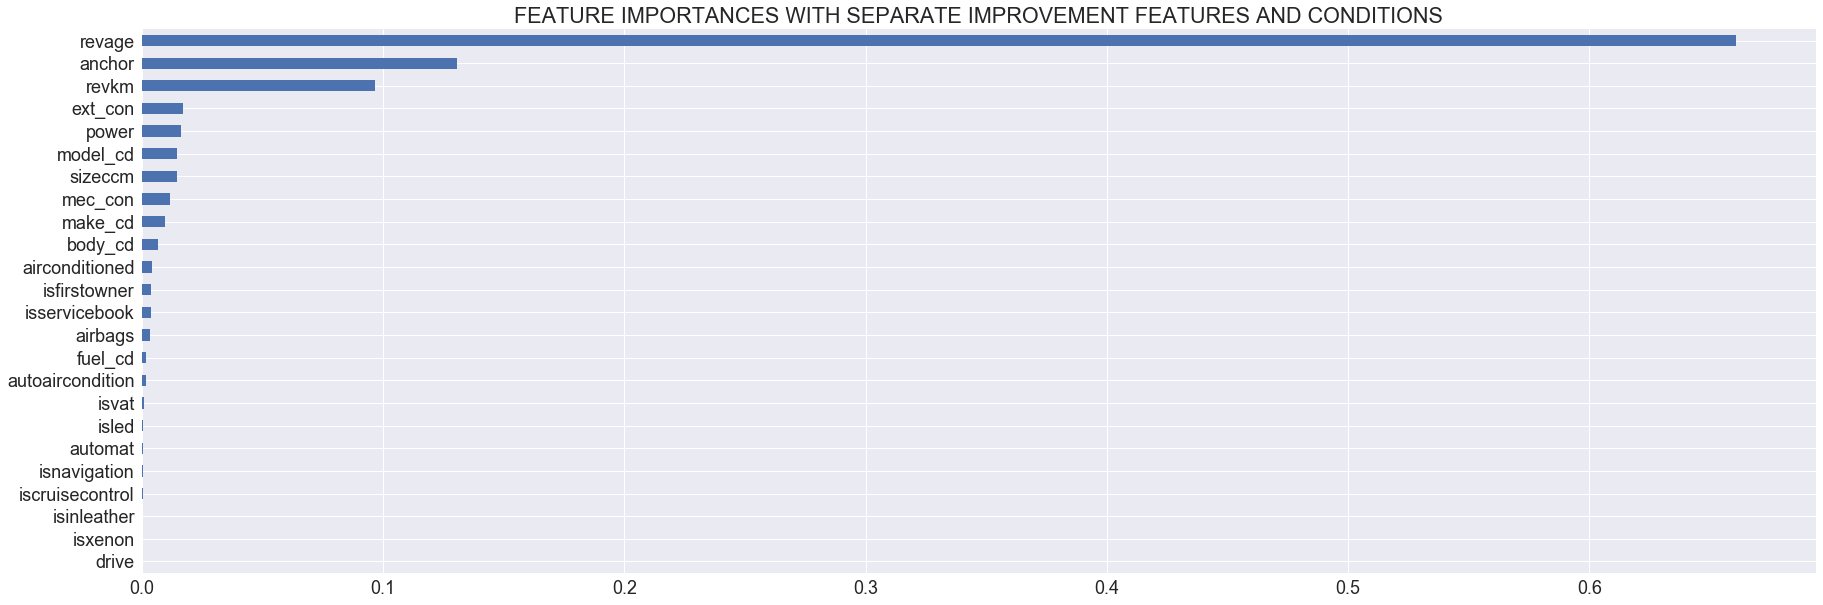

In [68]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[3].plot.barh()
plt.draw()
plt.show()

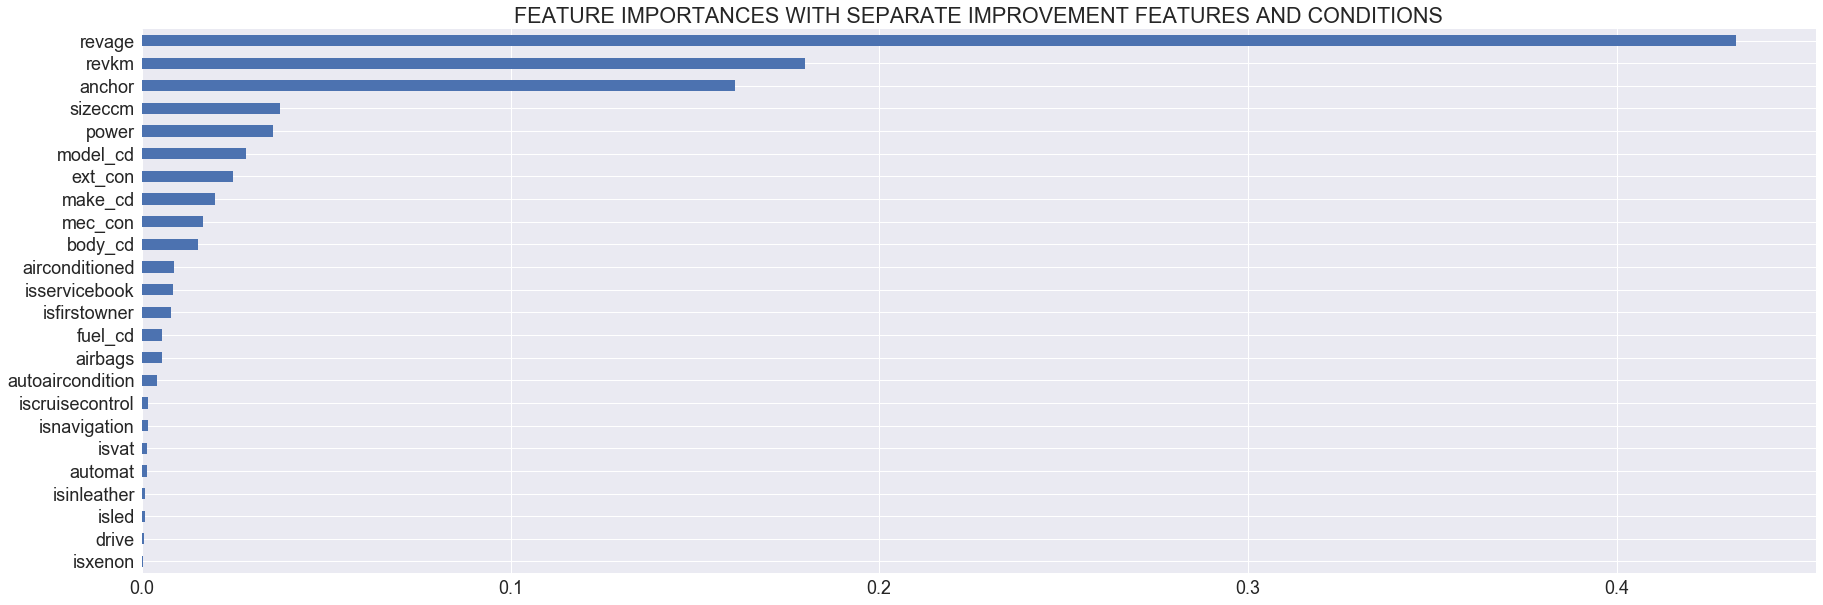

In [69]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[4].plot.barh()
plt.draw()
plt.show()

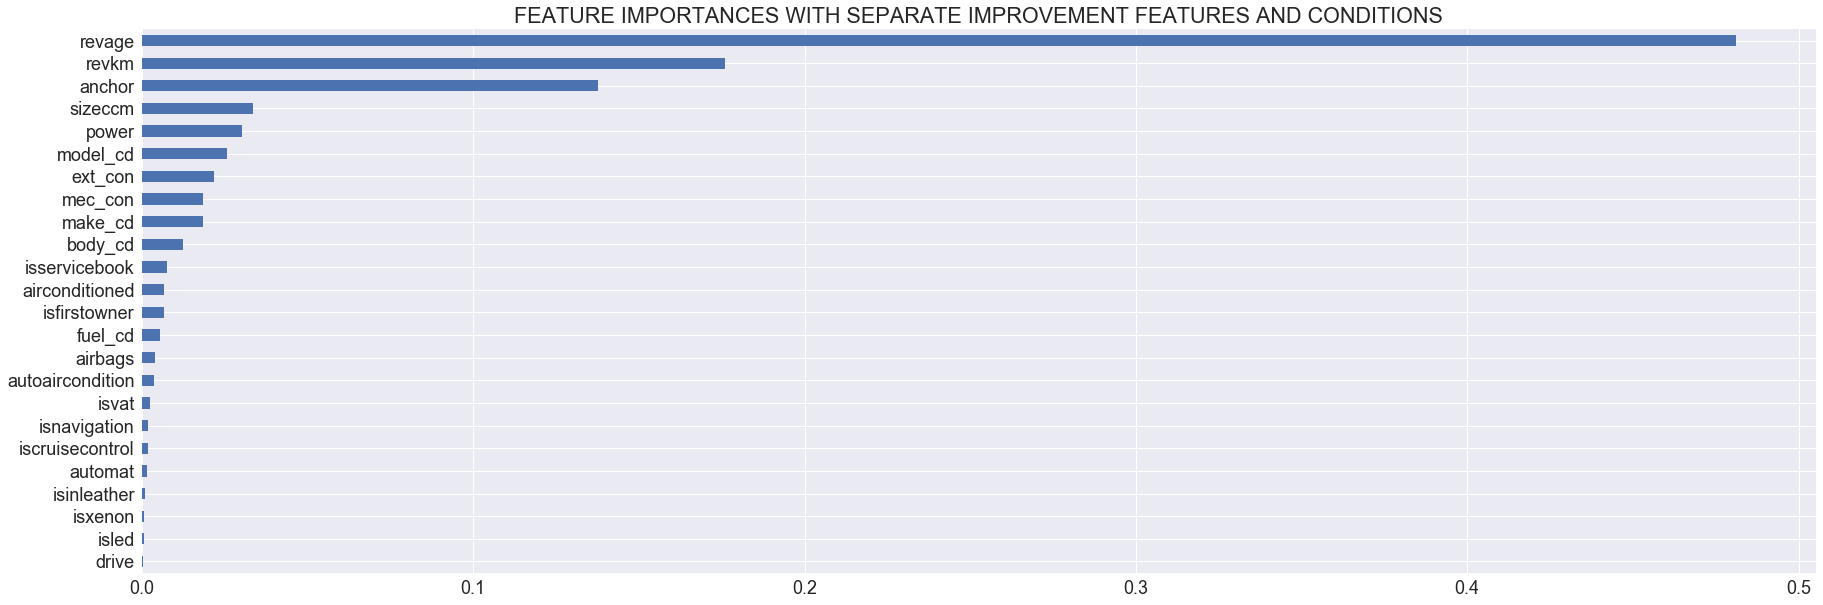

In [70]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[5].plot.barh()
plt.draw()
plt.show()

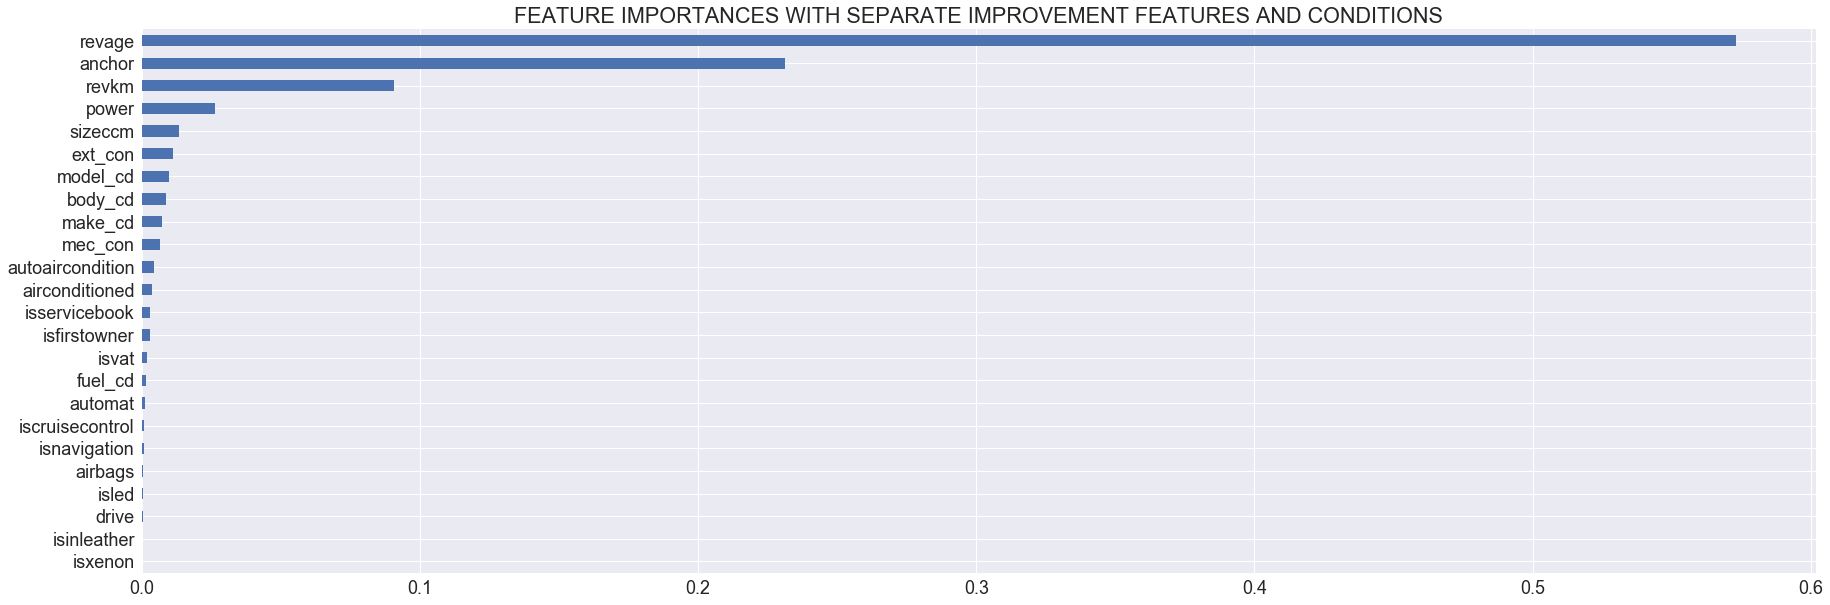

In [71]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[6].plot.barh()
plt.draw()
plt.show()

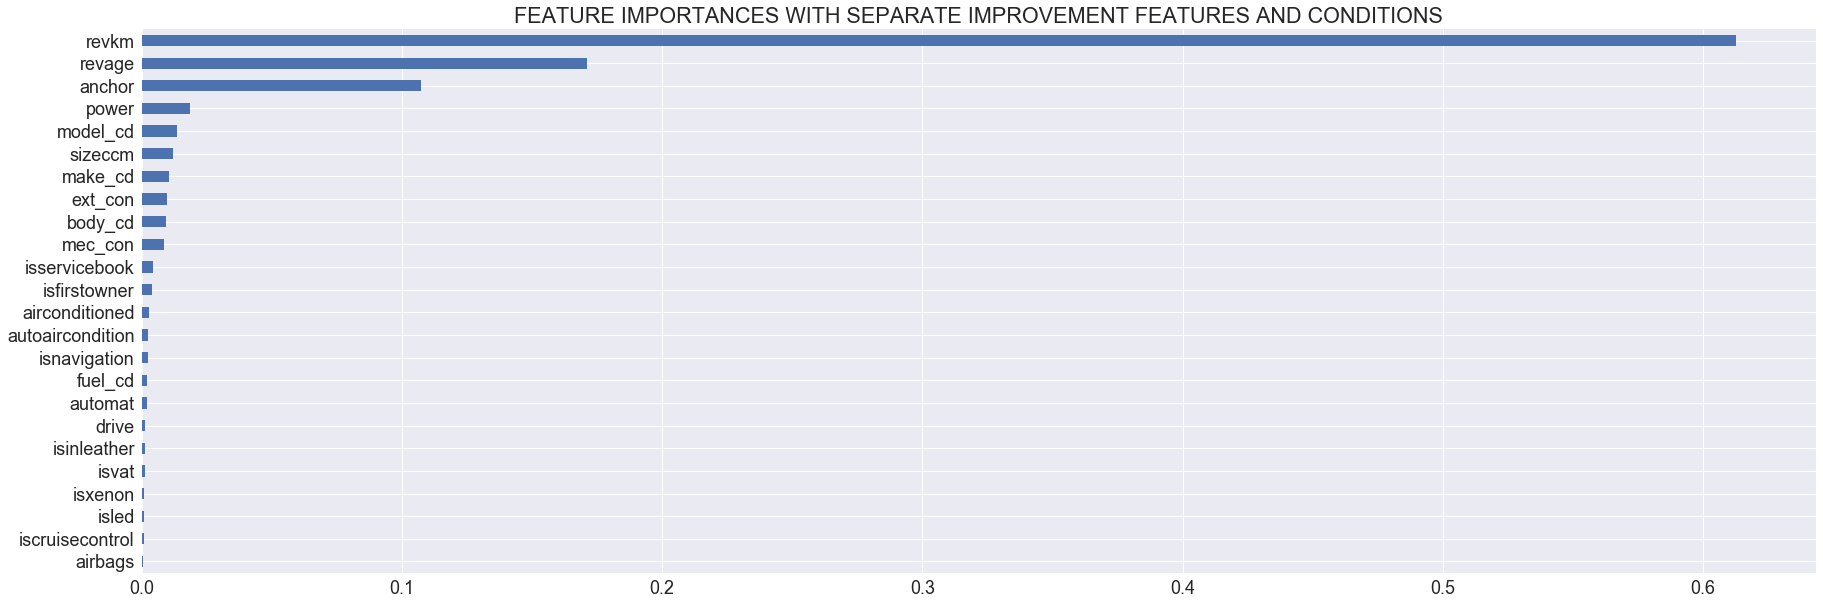

In [72]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[7].plot.barh()
plt.draw()
plt.show()

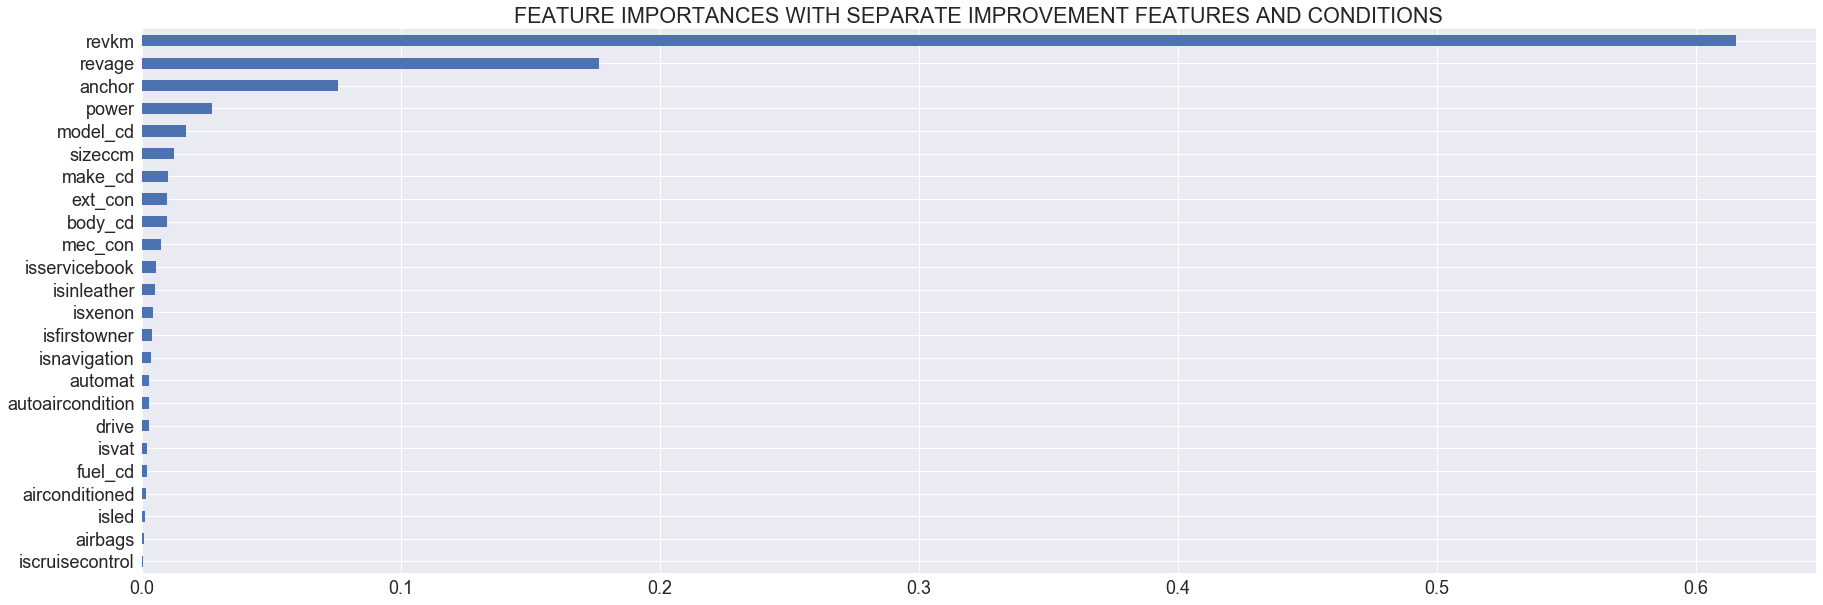

In [73]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[8].plot.barh()
plt.draw()
plt.show()

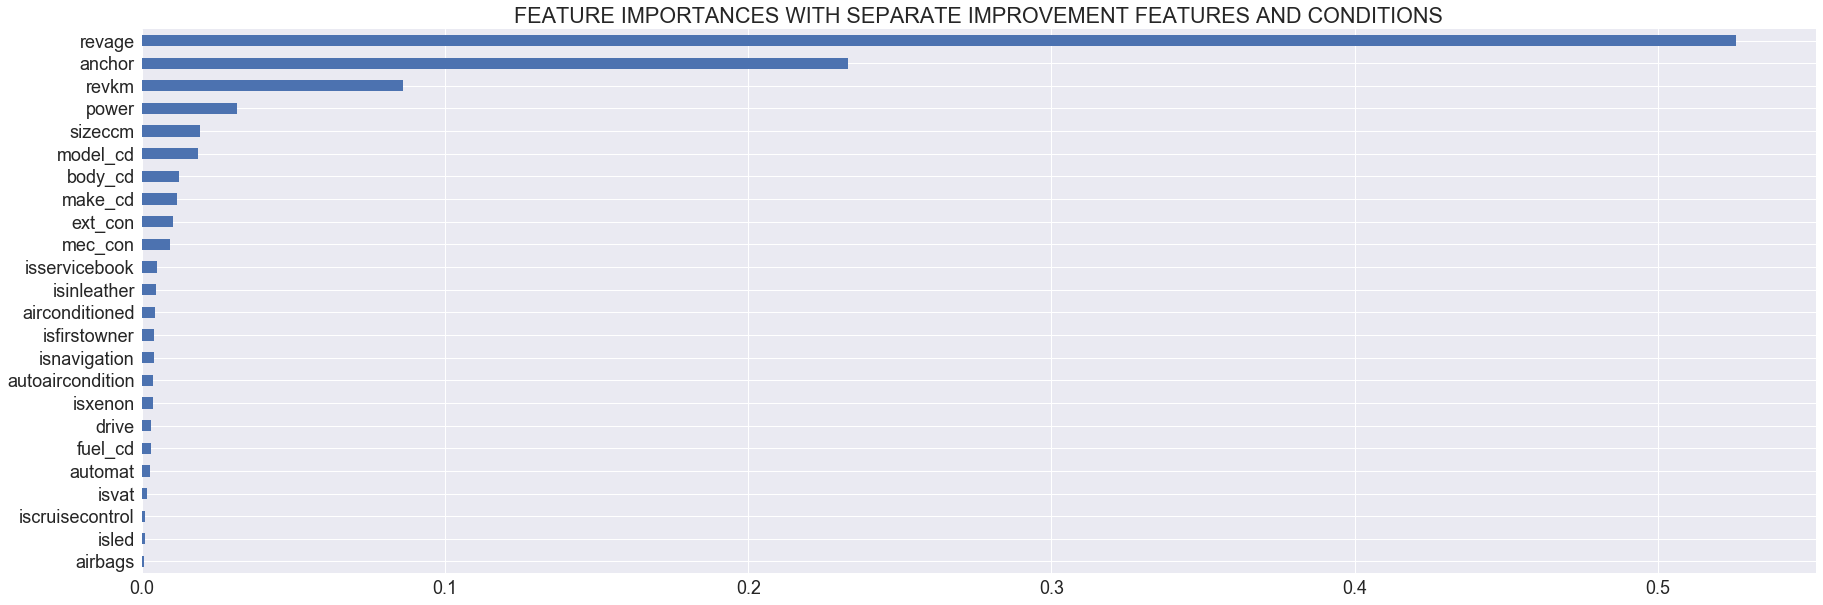

In [74]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[9].plot.barh()
plt.draw()
plt.show()

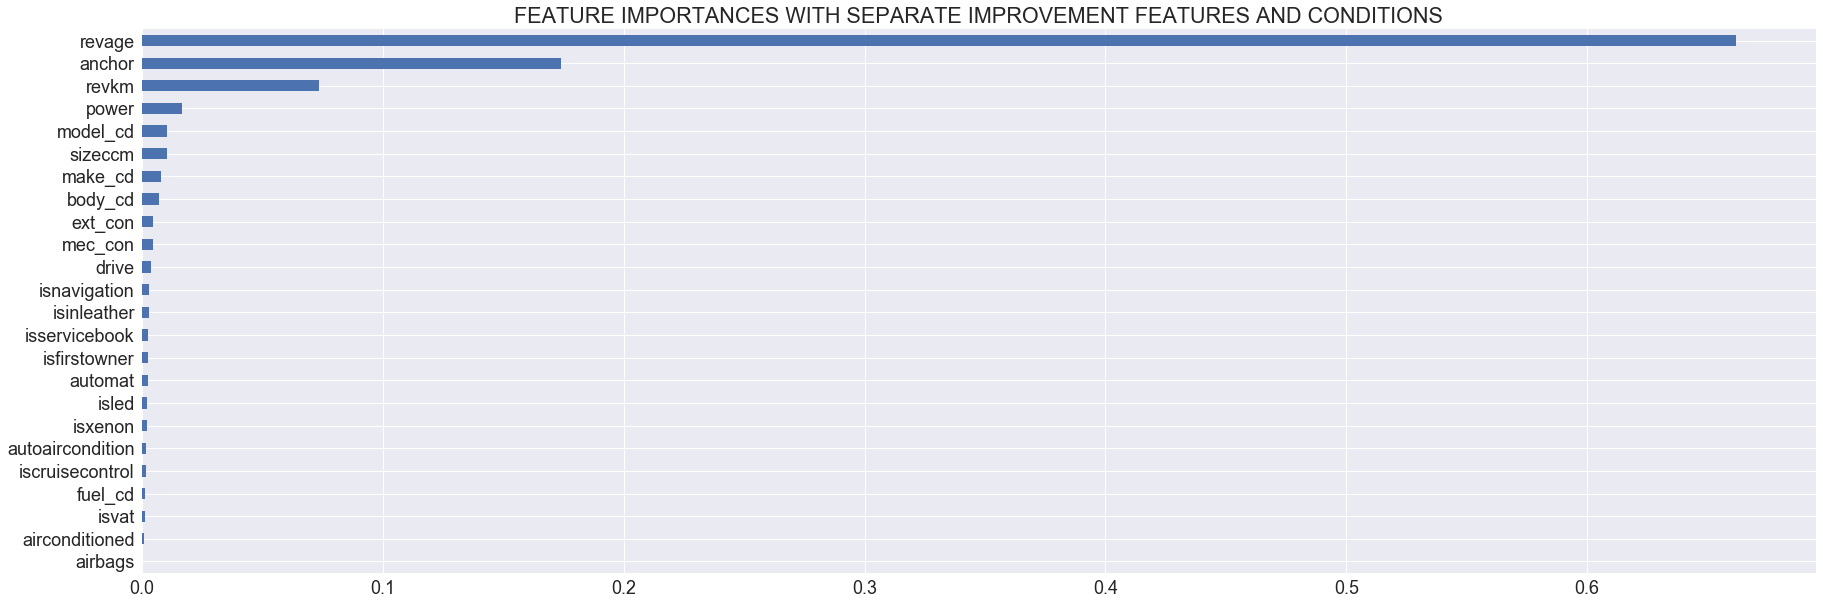

In [75]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[10].plot.barh()
plt.draw()
plt.show()

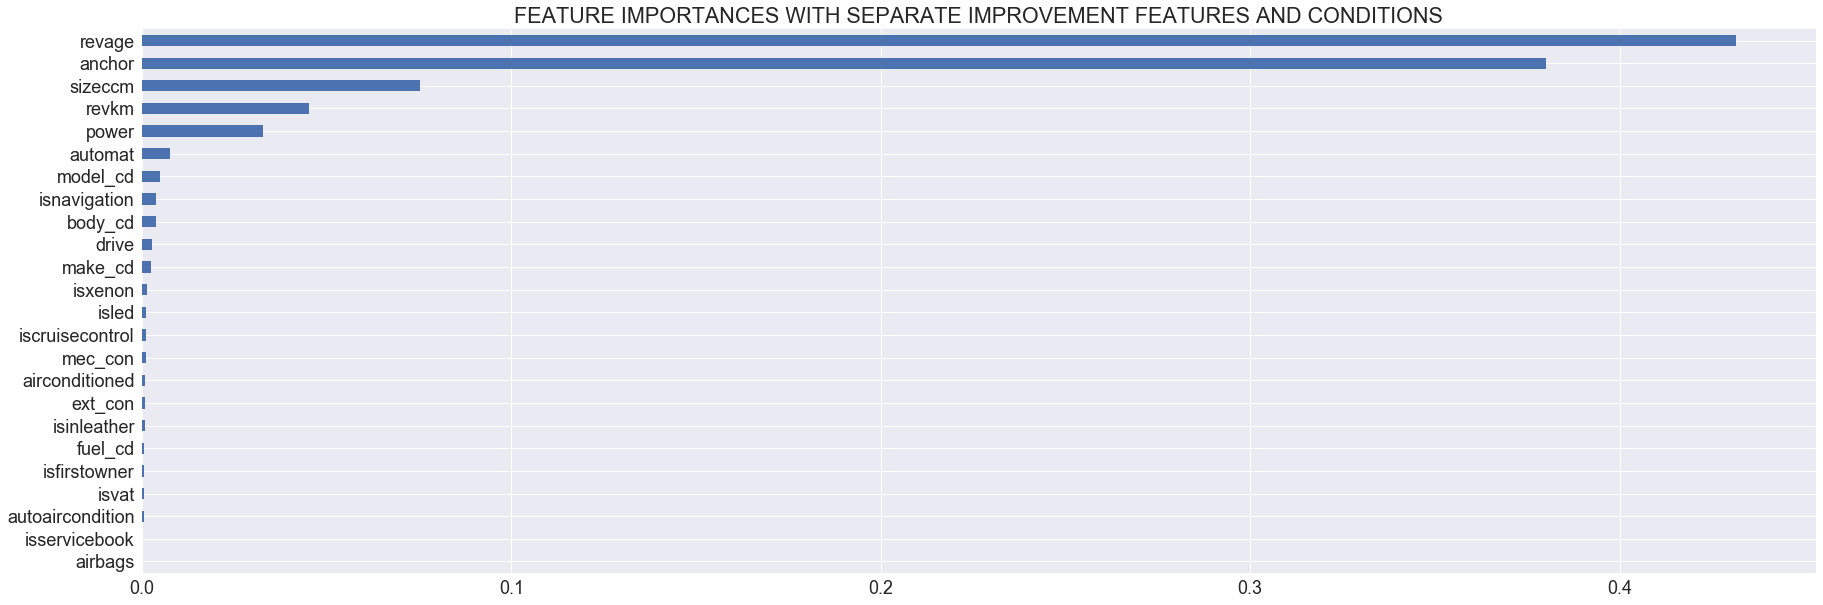

In [76]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[11].plot.barh()
plt.draw()
plt.show()

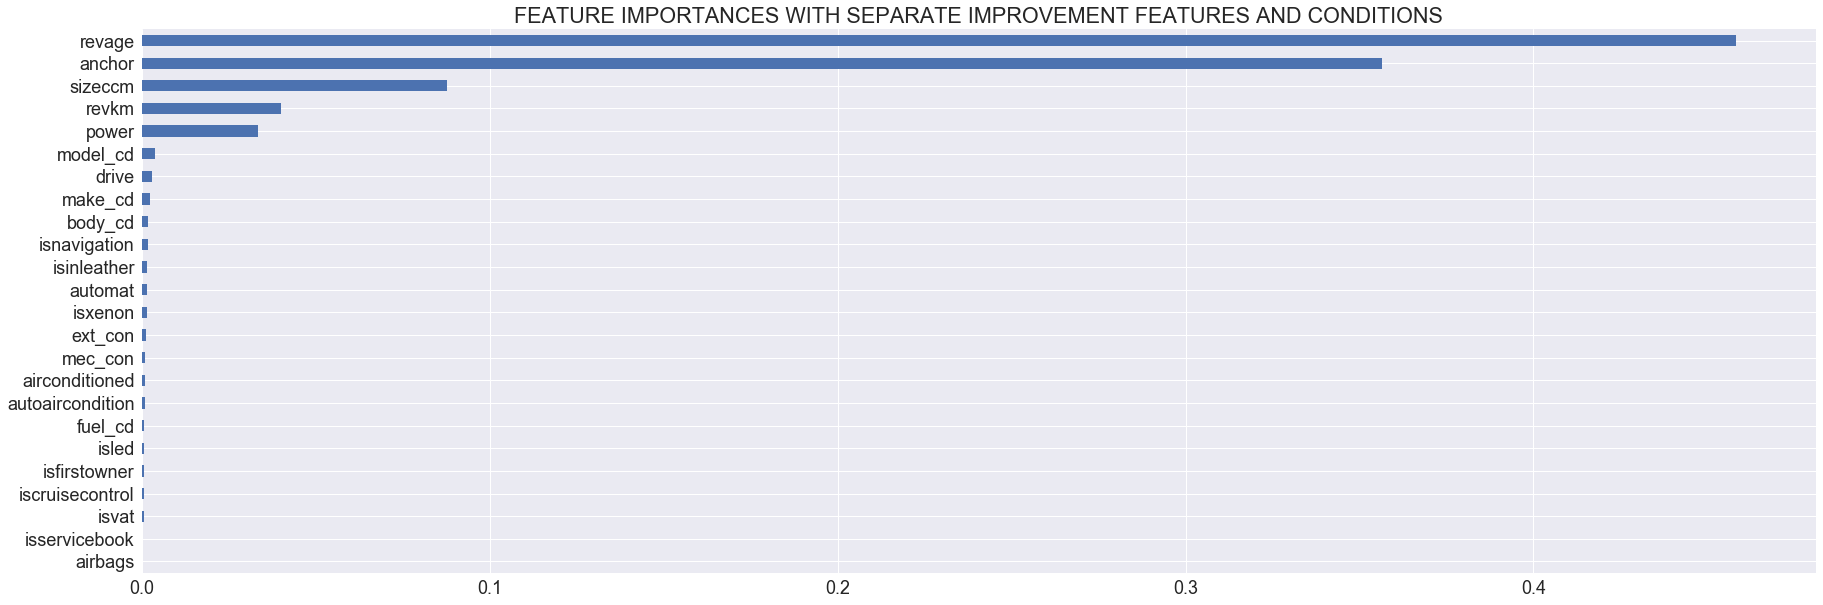

In [77]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[12].plot.barh()
plt.draw()
plt.show()

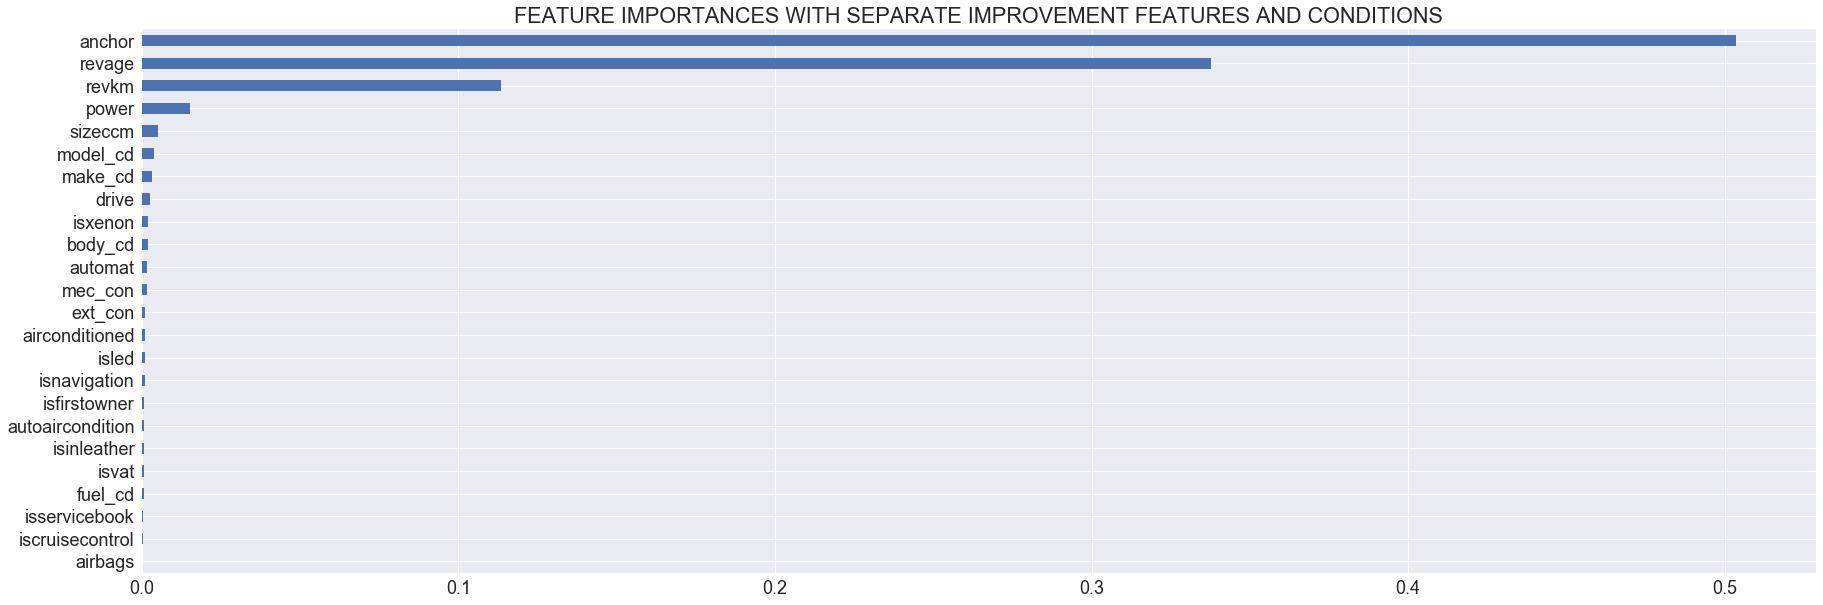

In [78]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[13].plot.barh()
plt.draw()
plt.show()

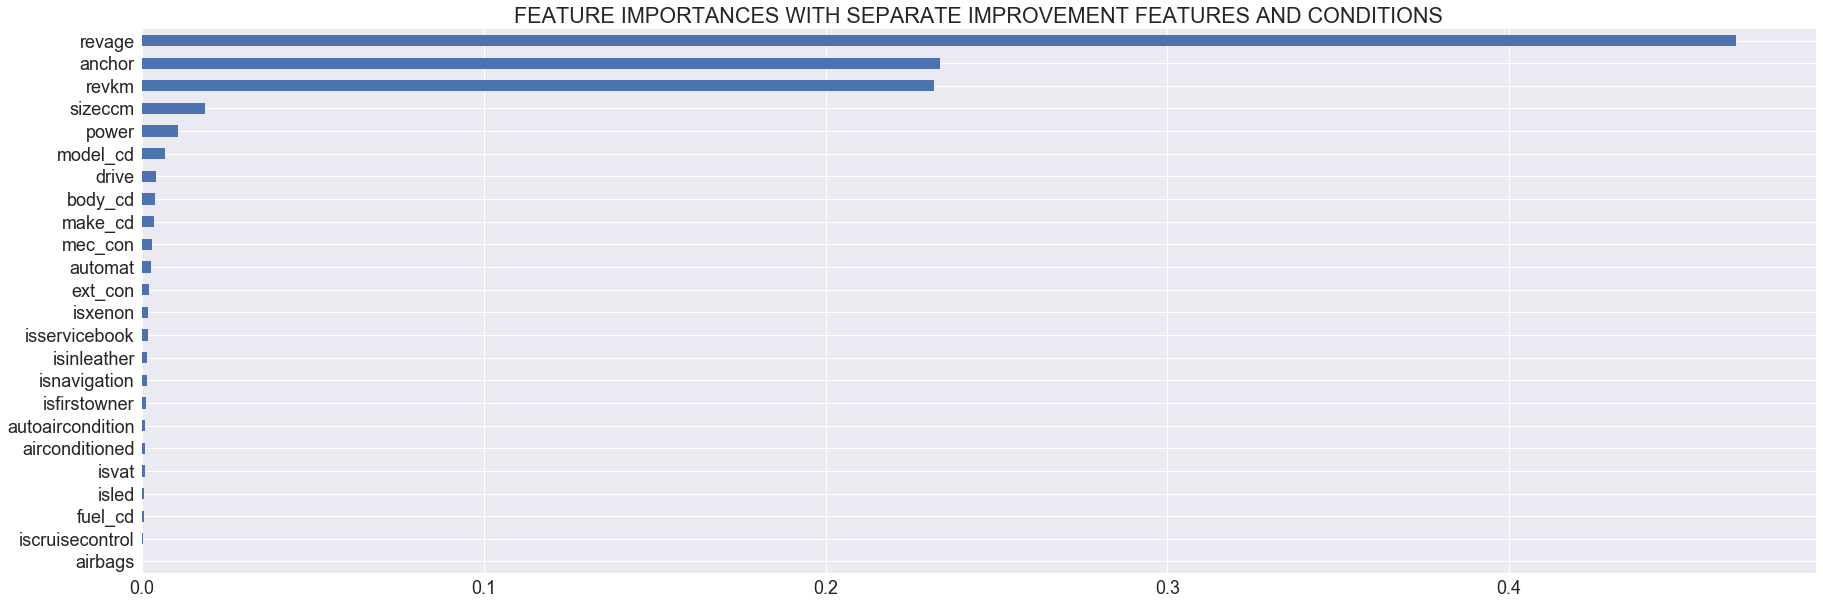

In [79]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[14].plot.barh()
plt.draw()
plt.show()

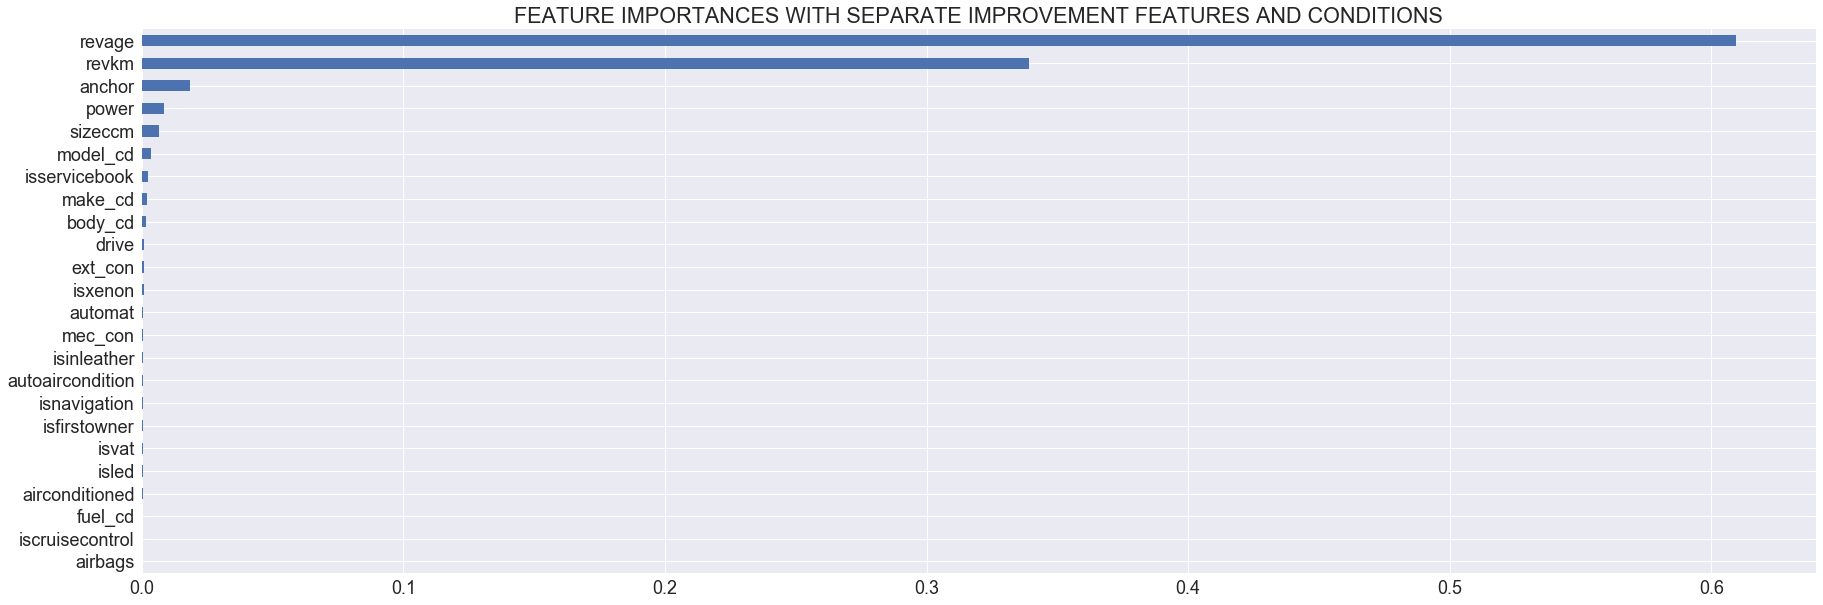

In [80]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[15].plot.barh()
plt.draw()
plt.show()

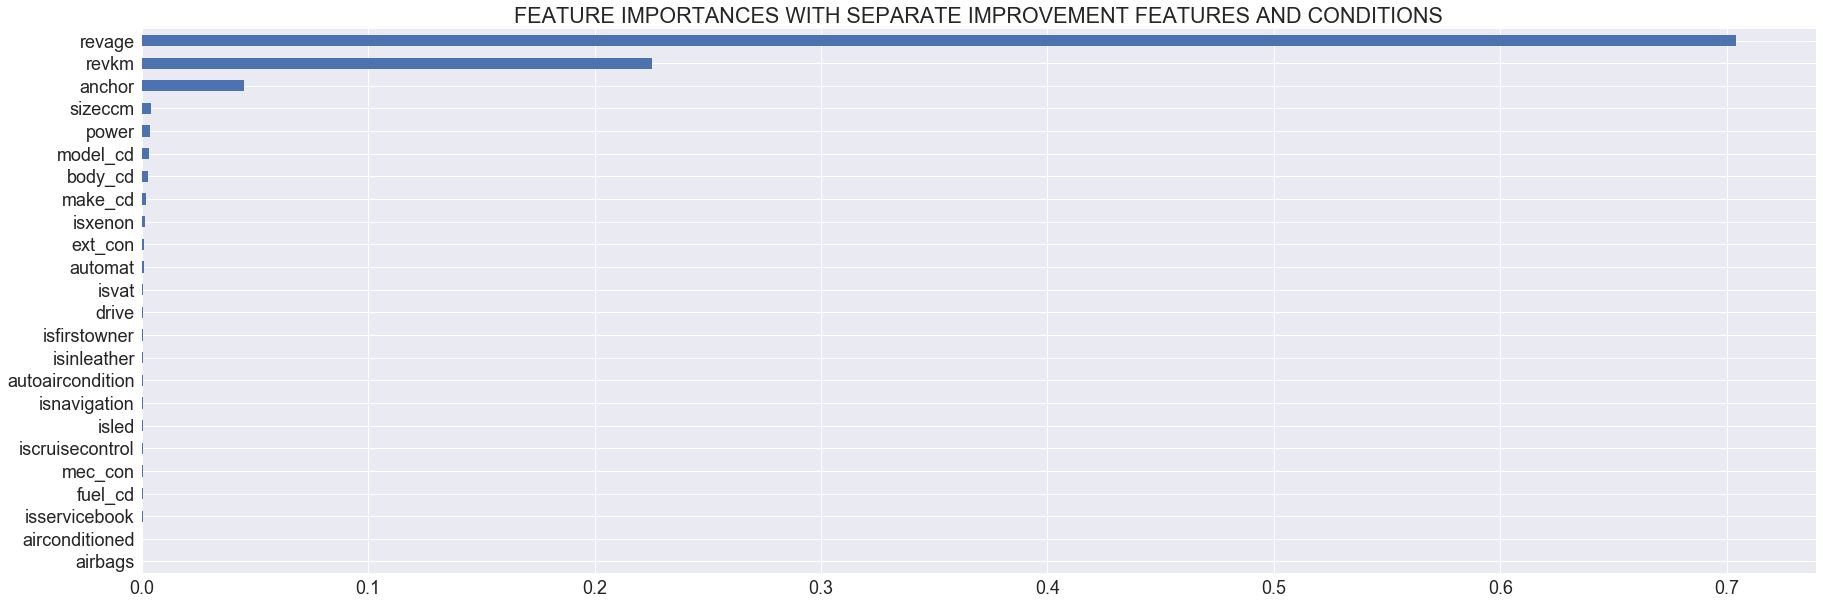

In [81]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[16].plot.barh()
plt.draw()
plt.show()

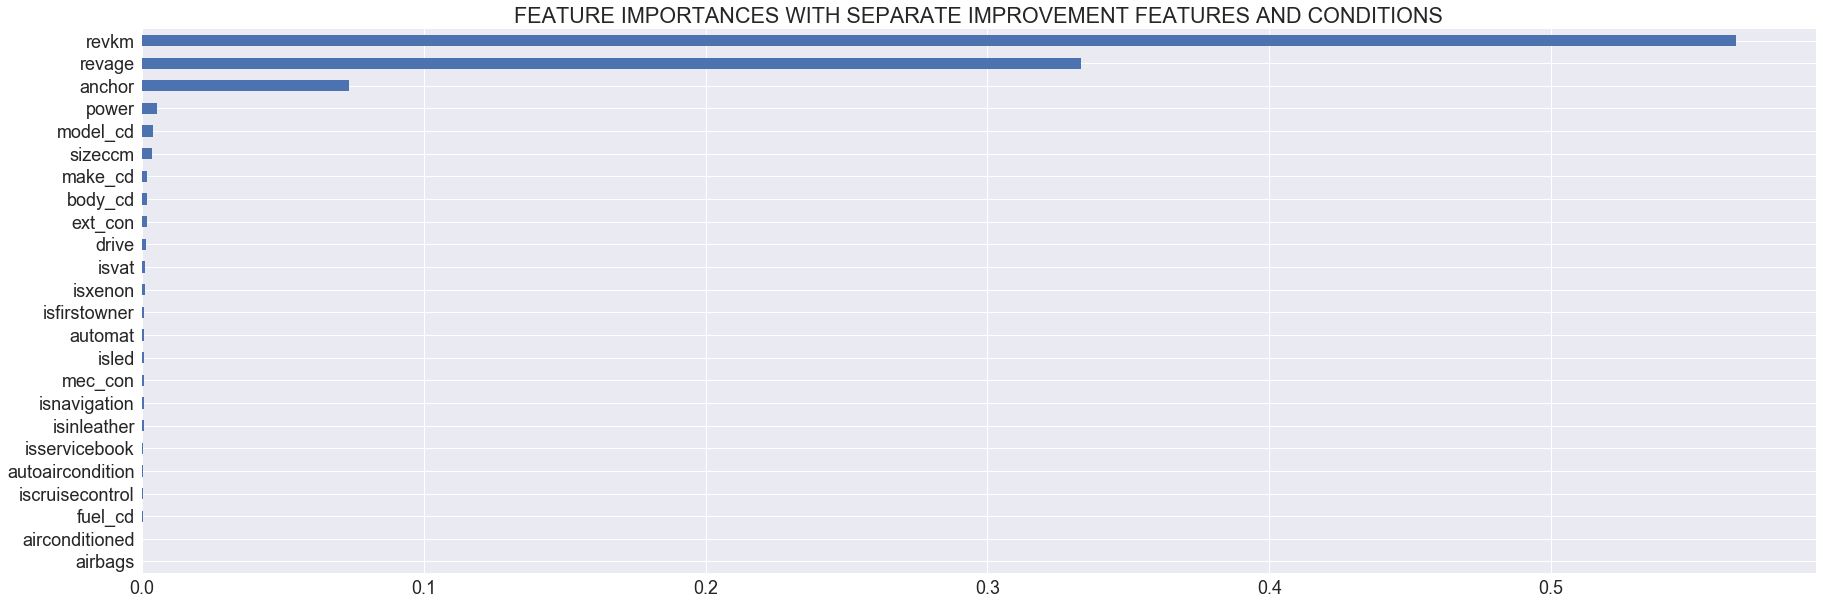

In [82]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[17].plot.barh()
plt.draw()
plt.show()

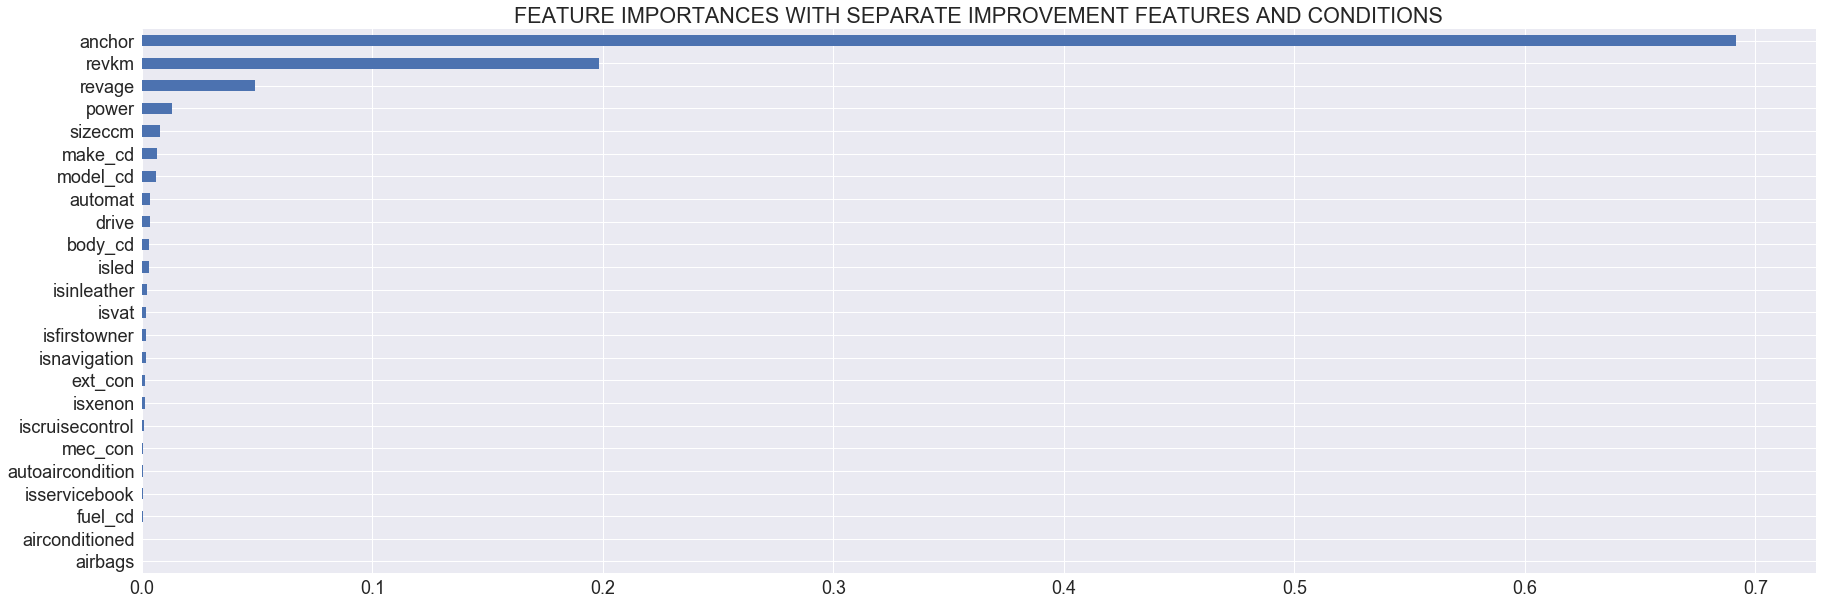

In [83]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[18].plot.barh()
plt.draw()
plt.show()

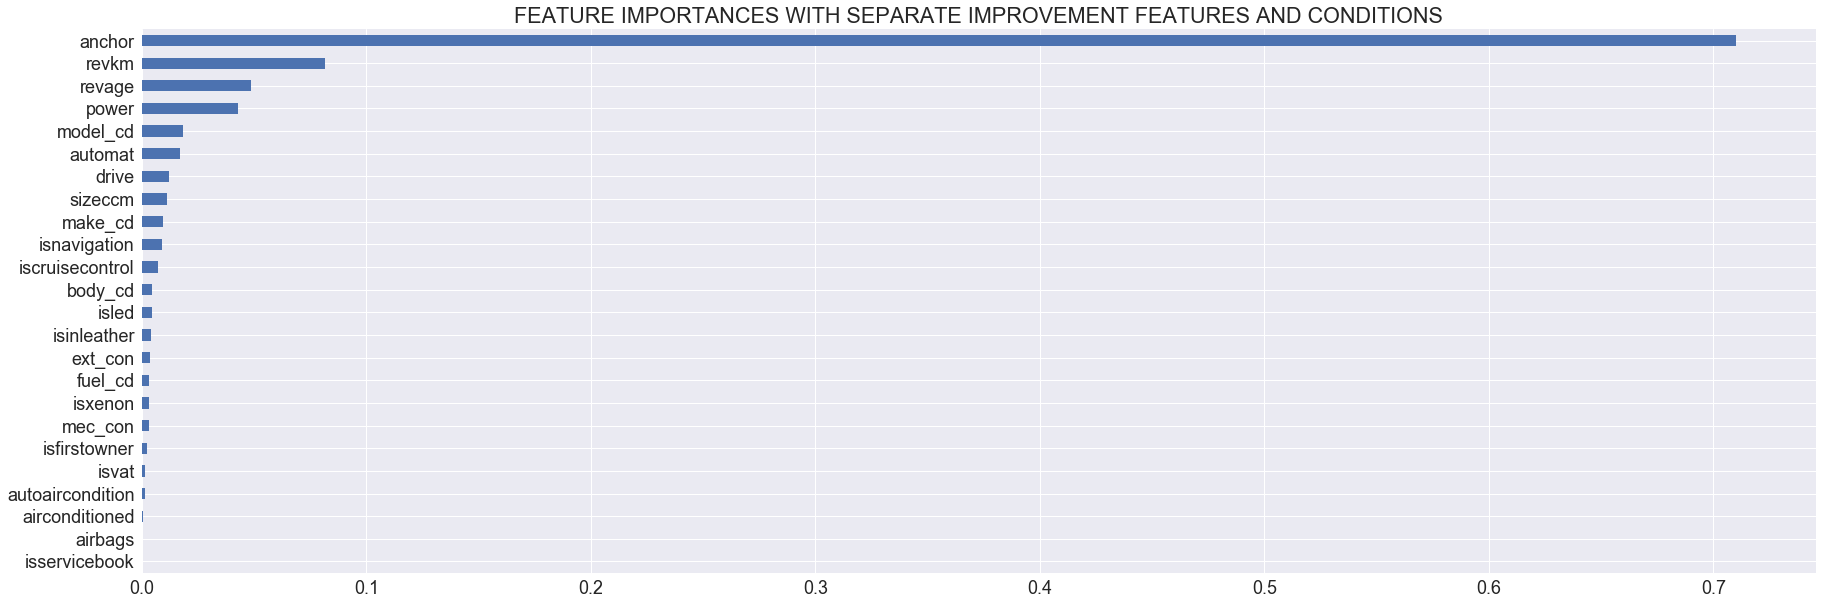

In [84]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[19].plot.barh()
plt.draw()
plt.show()

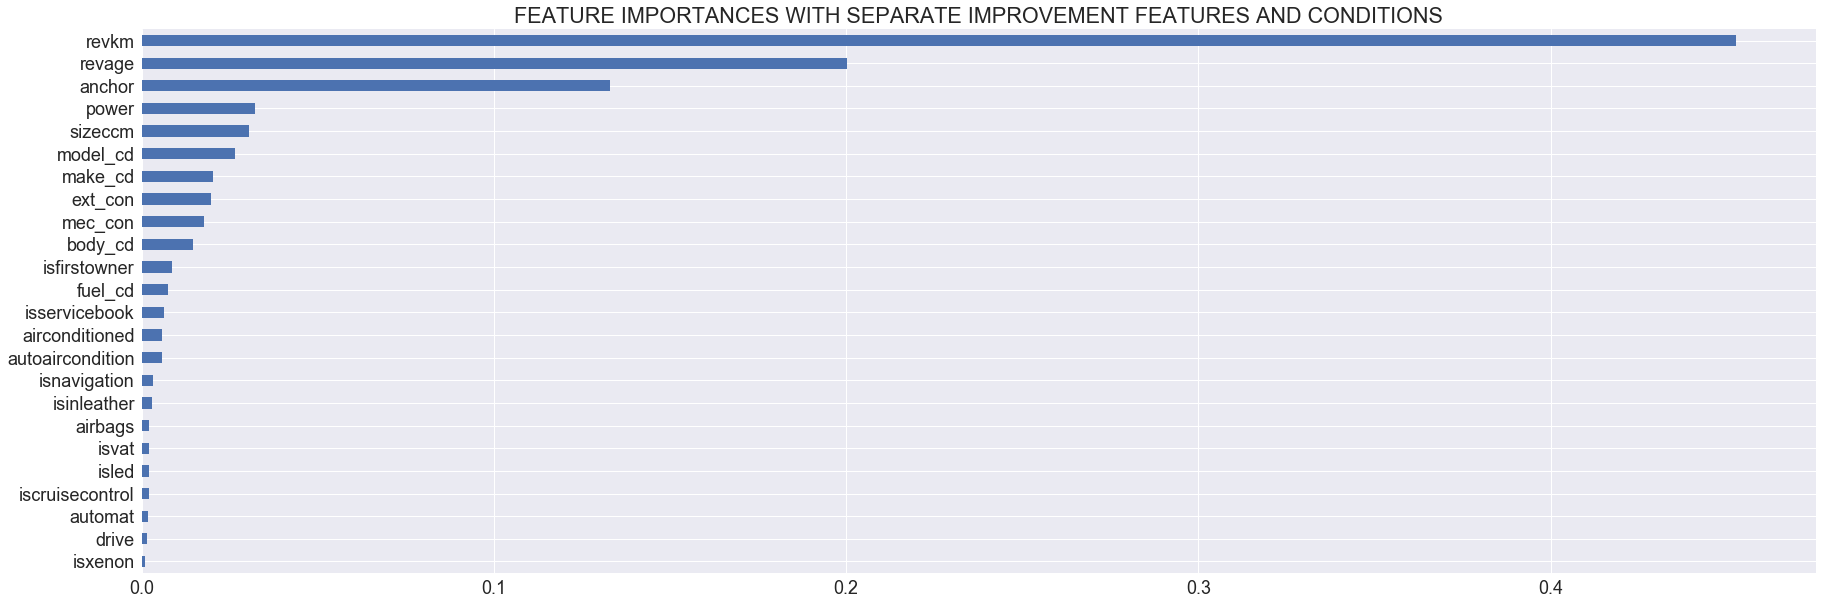

In [85]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[20].plot.barh()
plt.draw()
plt.show()

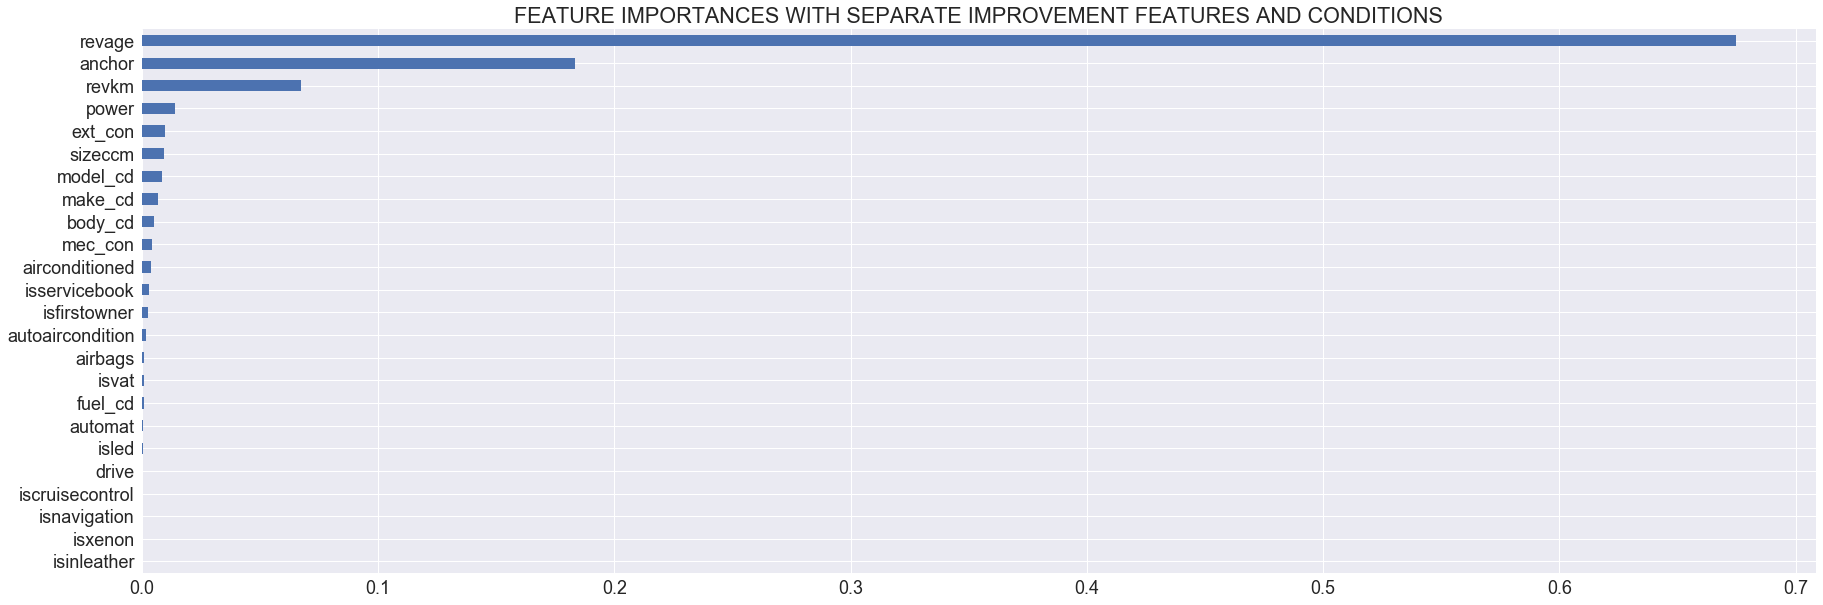

In [86]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[21].plot.barh()
plt.draw()
plt.show()

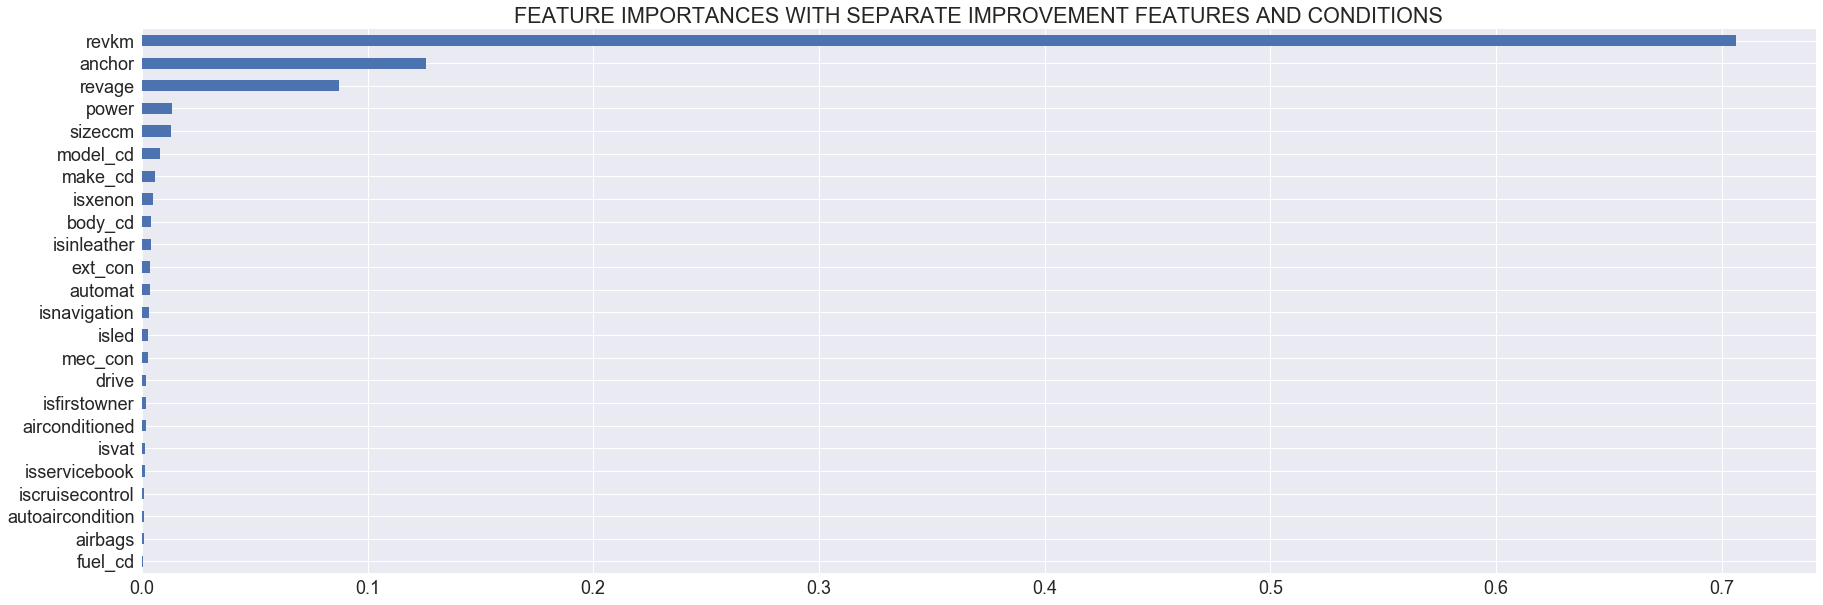

In [87]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[22].plot.barh()
plt.draw()
plt.show()

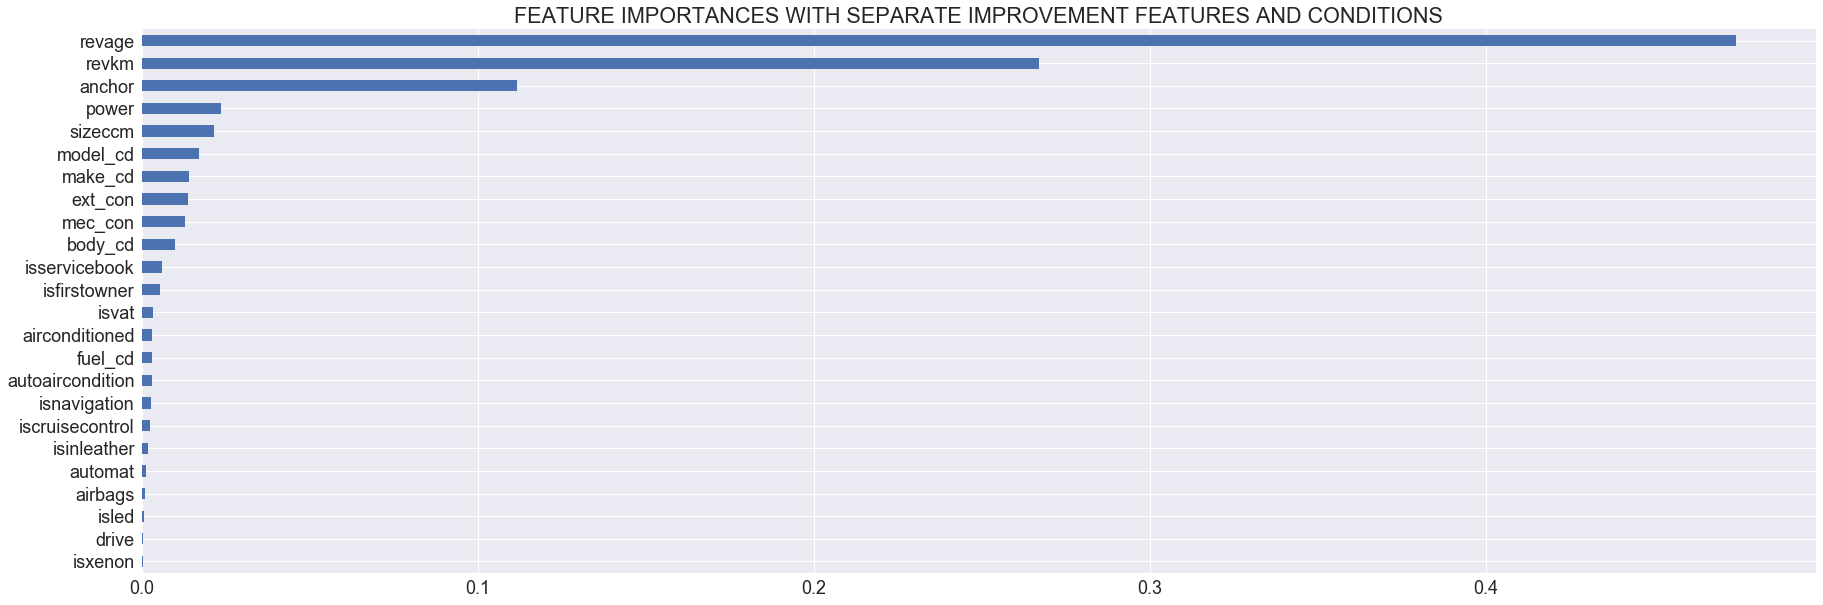

In [88]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[23].plot.barh()
plt.draw()
plt.show()

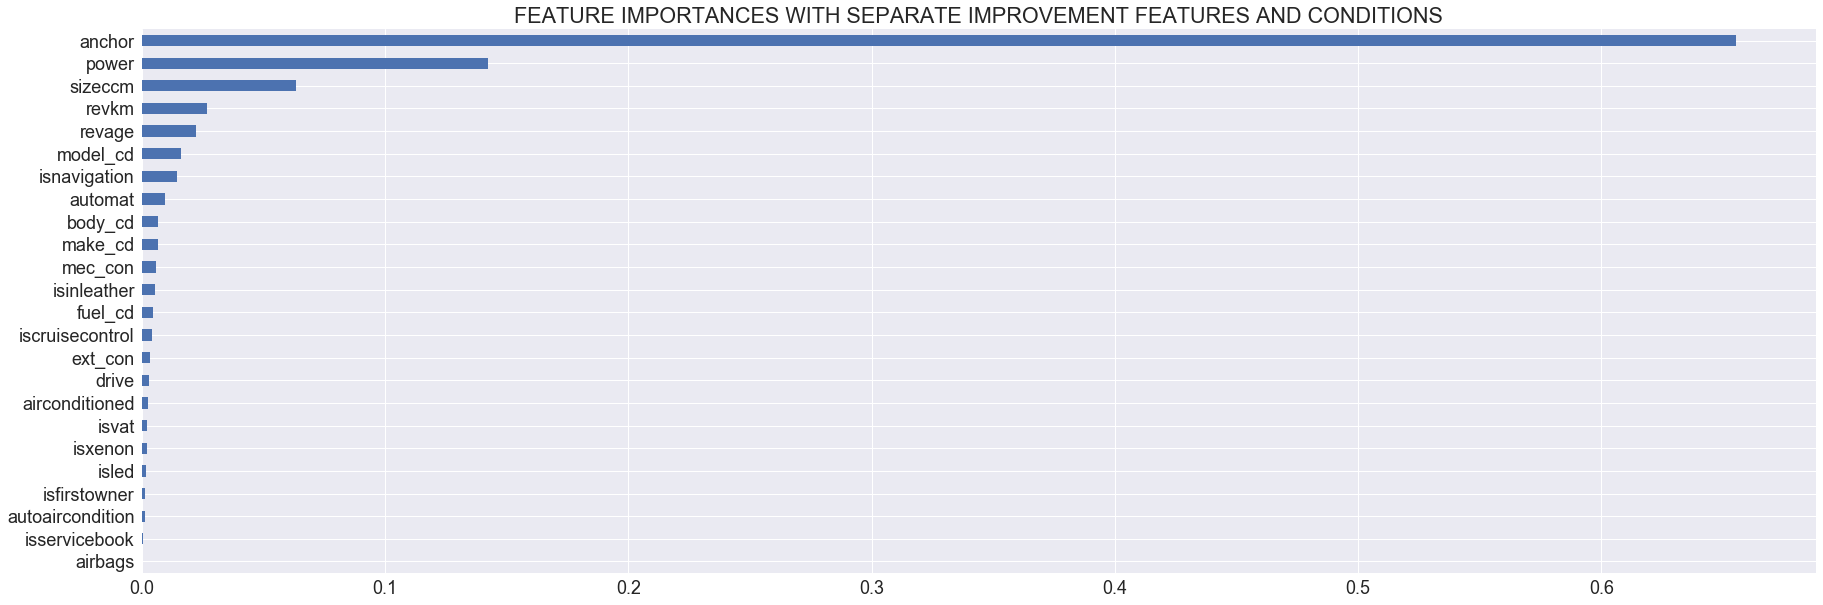

In [89]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[24].plot.barh()
plt.draw()
plt.show()

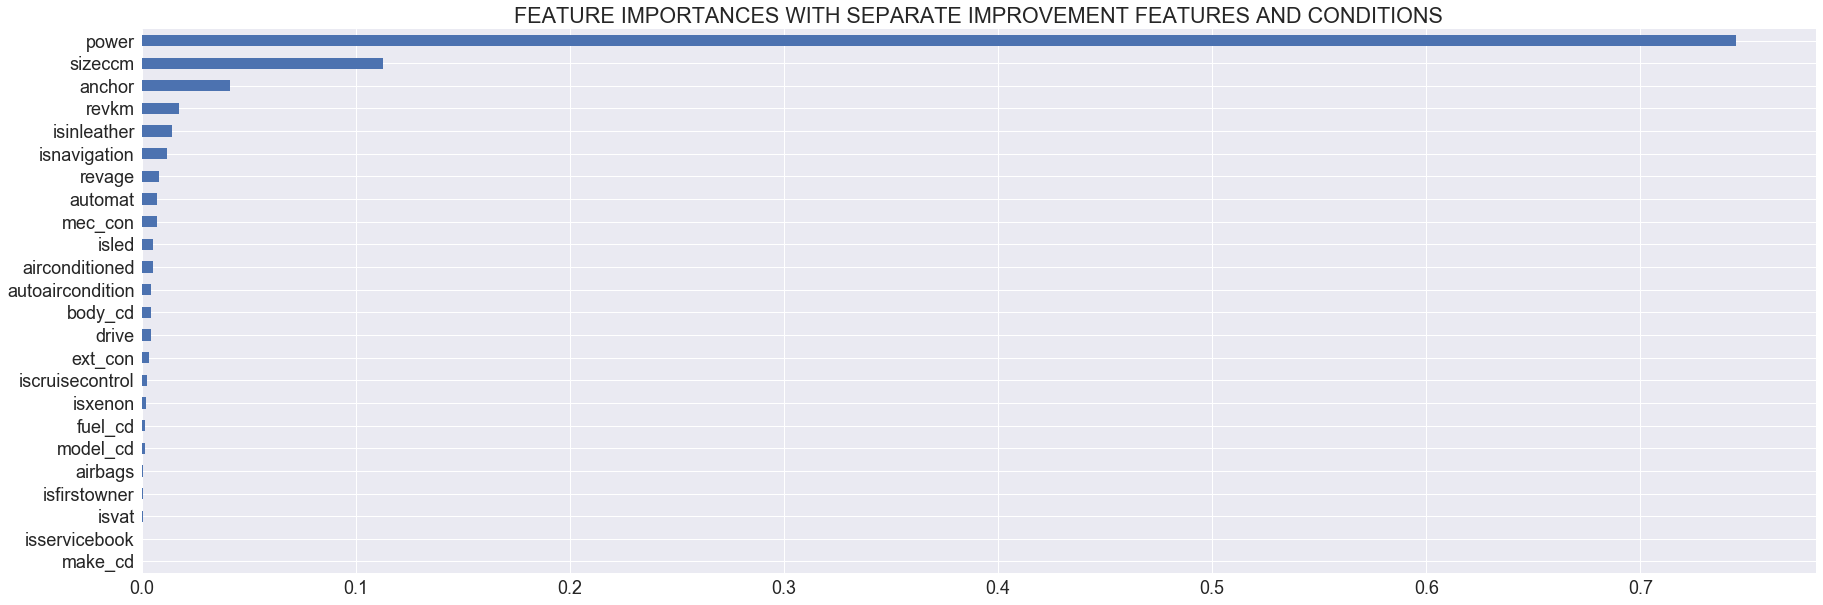

In [90]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[25].plot.barh()
plt.draw()
plt.show()

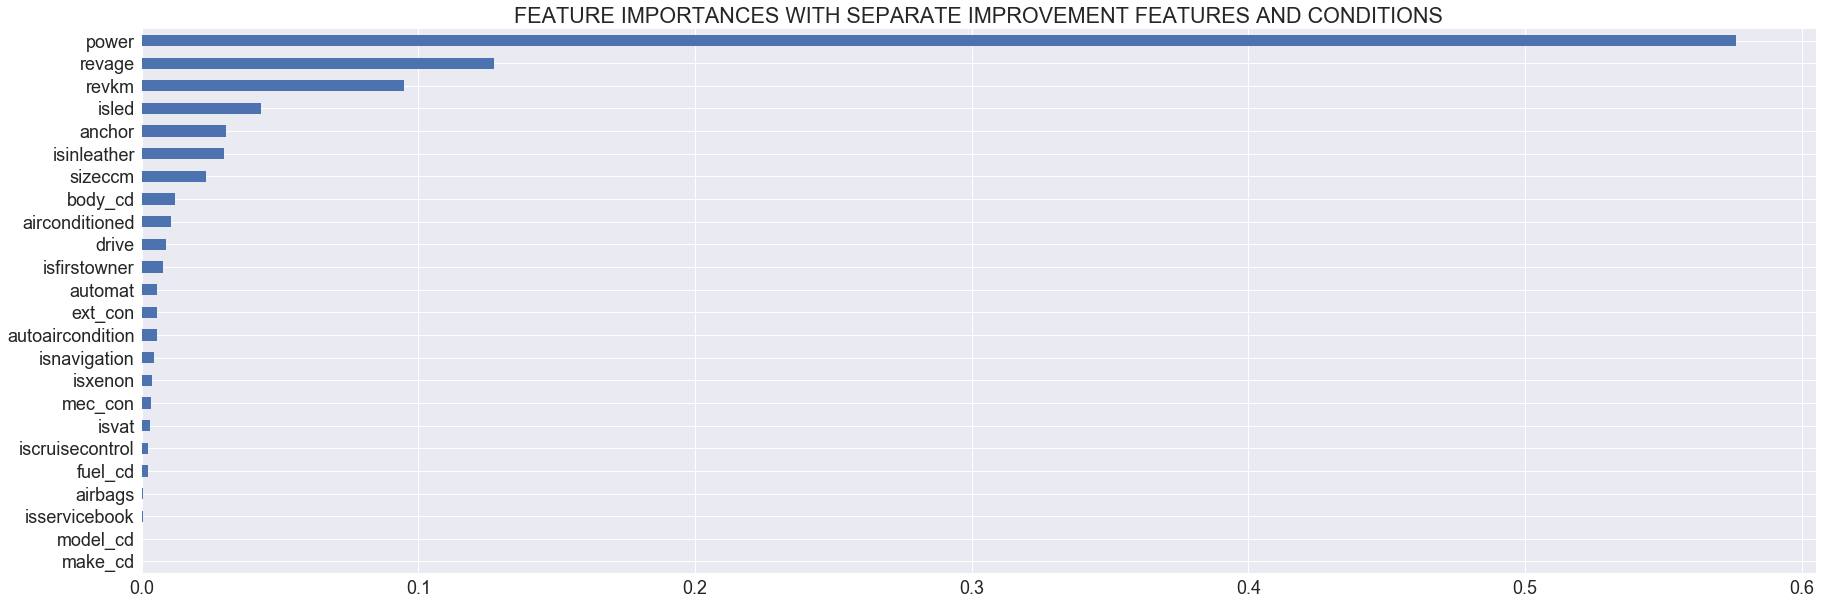

In [91]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[26].plot.barh()
plt.draw()
plt.show()

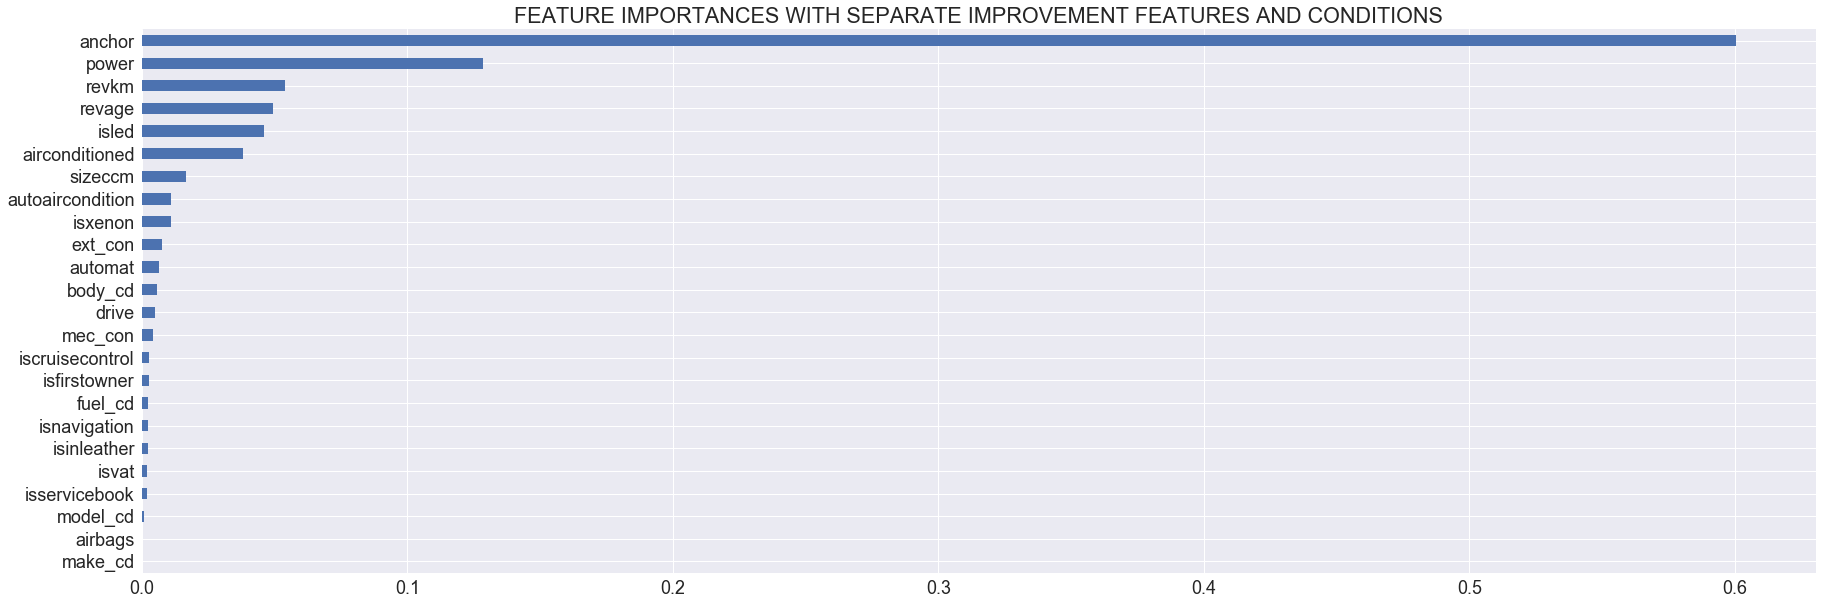

In [92]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[27].plot.barh()
plt.draw()
plt.show()

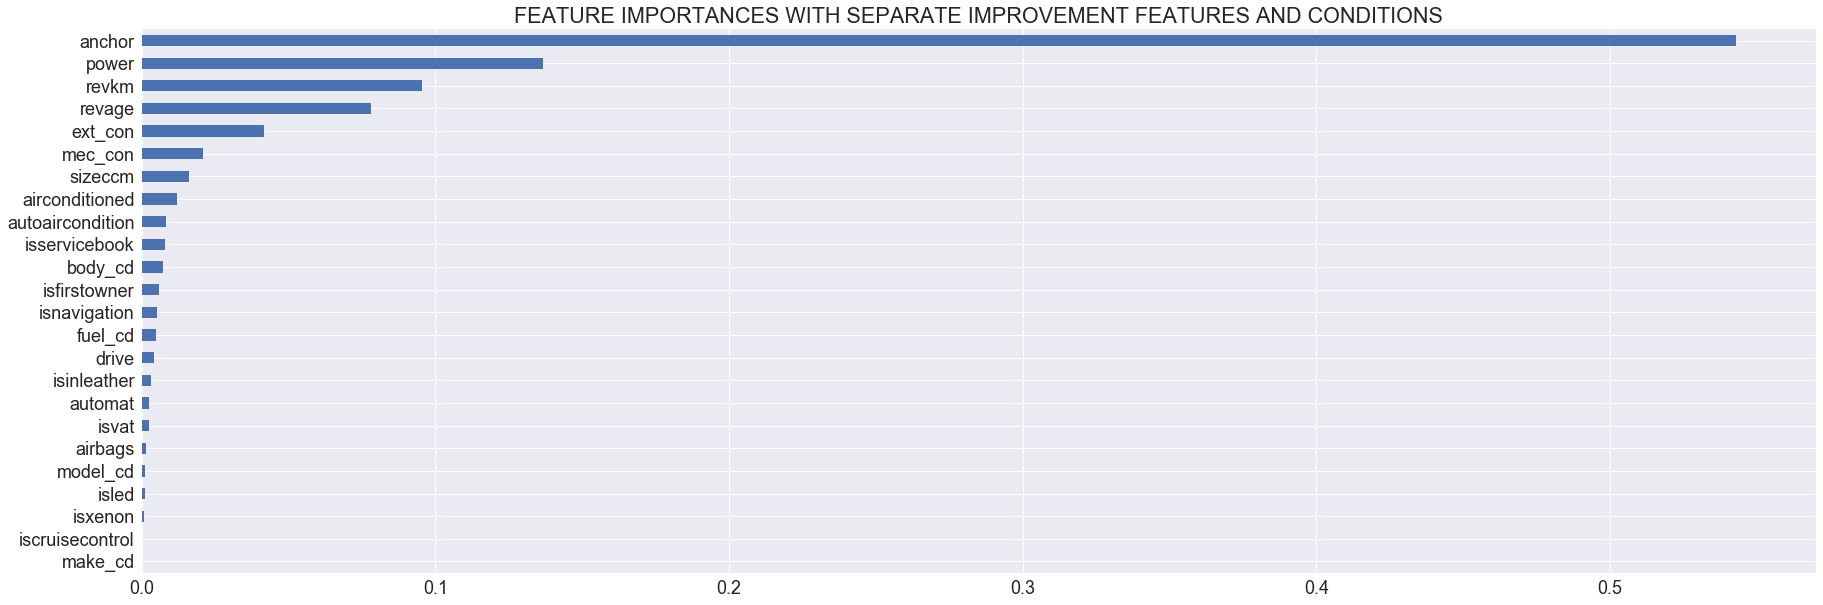

In [93]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[28].plot.barh()
plt.draw()
plt.show()

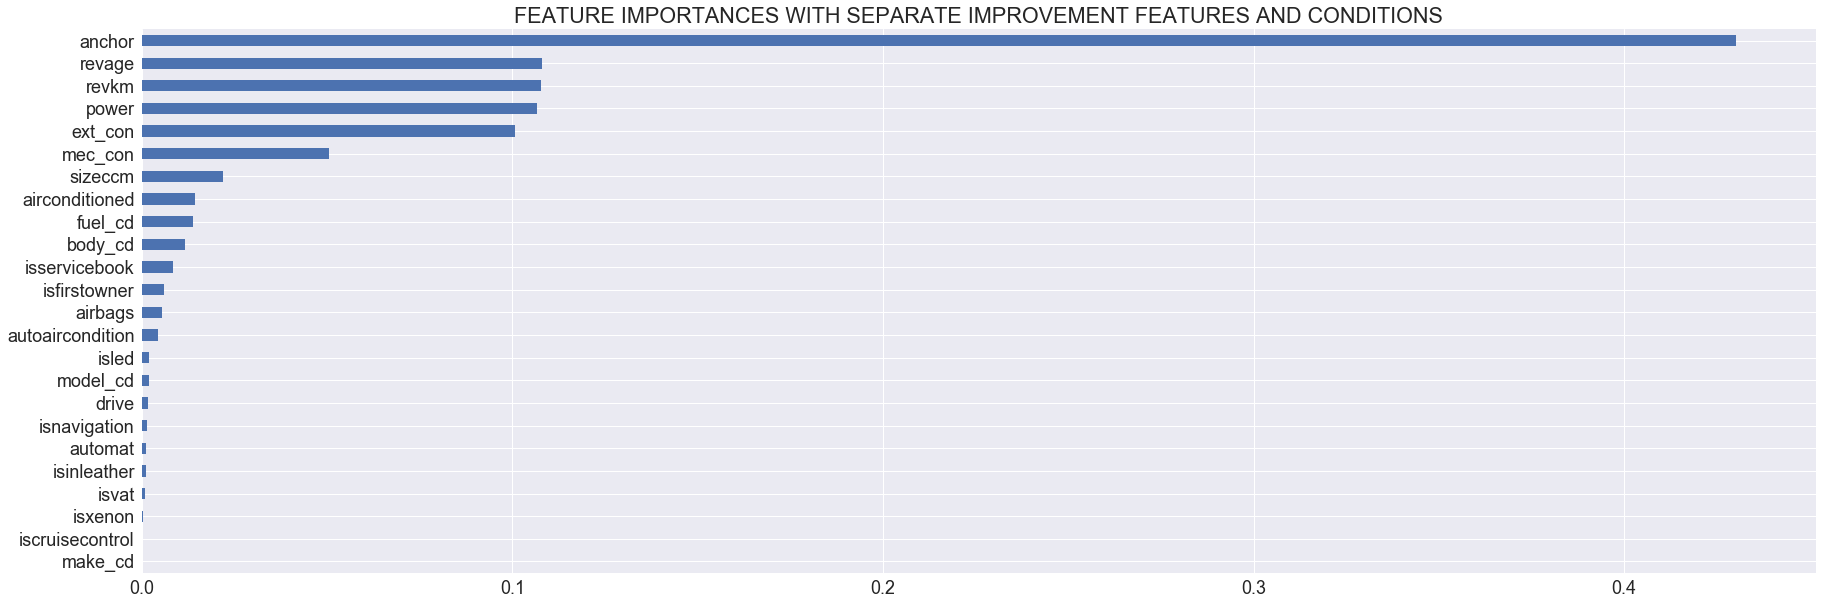

In [94]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[29].plot.barh()
plt.draw()
plt.show()

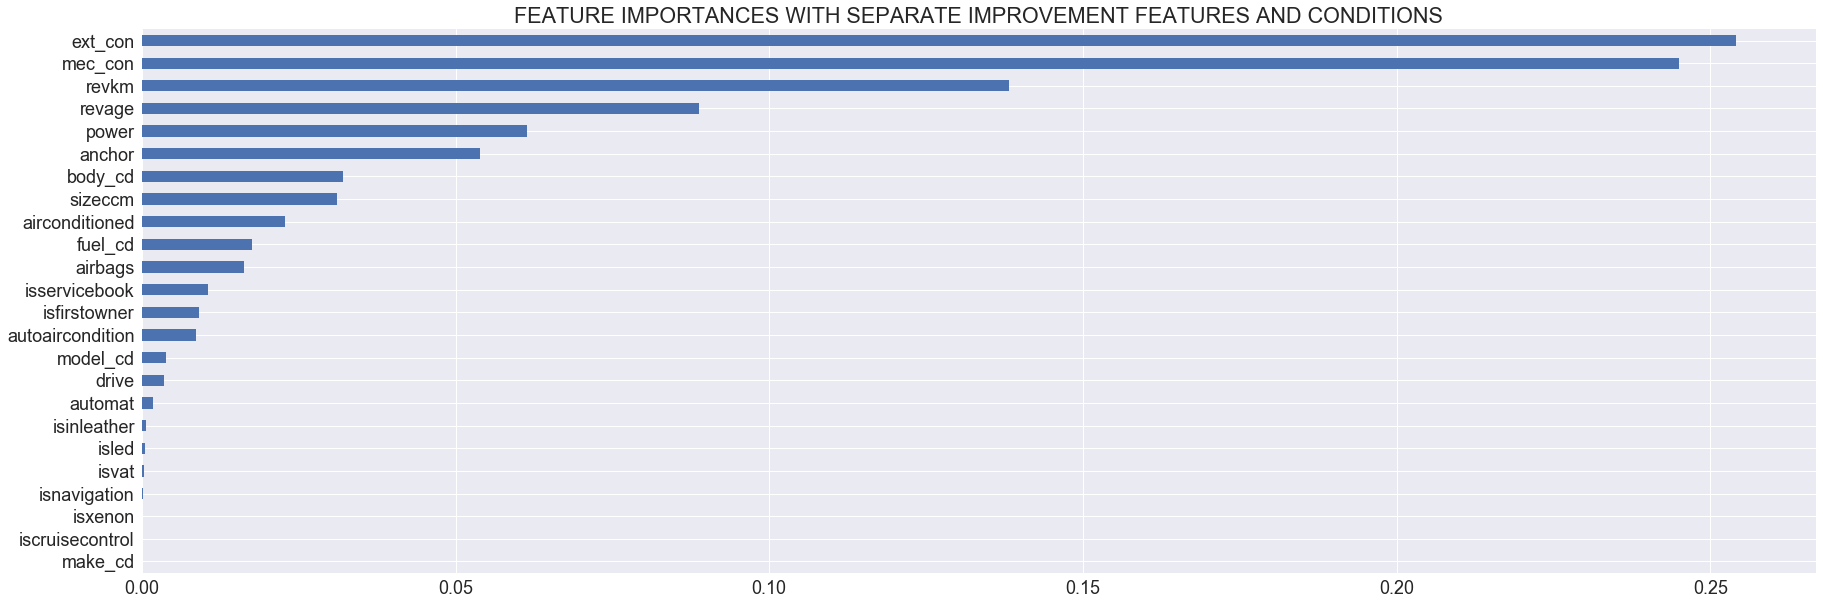

In [95]:
sns.set_context("notebook",font_scale=1.8)
plt.figure(figsize=(30,10))
plt.title('FEATURE IMPORTANCES WITH SEPARATE IMPROVEMENT FEATURES AND CONDITIONS')
featimps[30].plot.barh()
plt.draw()
plt.show()